In [1]:
%matplotlib notebook

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="white")

## Setting max displayed rows to 500, in order to display the full output of any command
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# Setting to avoid scientific notation
pd.set_option('display.float_format', lambda x: '%.5f' % x)

# pour que les valeurs infinies soient considérées aussi comme des NaN :
pd.options.mode.use_inf_as_na = True

# sklearn
from sklearn.metrics import *

/Users/marie/.pyenv/versions/3.9.5/envs/simplon/lib/python3.9/site-packages/pandas/compat/__init__.py:109: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


# Code de modification des données
en doublon de celui présenté au fil de l'eau, simplement pour permettre de relancer directement le df

## Modification du dataset

In [2]:
df = pd.read_csv("../data/data_used/total_2018.csv")

/Users/marie/.pyenv/versions/3.9.5/envs/simplon/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3169: DtypeWarning: Columns (87) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
def calcul_ratios(df):
    df["Credit client"] = (df['Clients et comptes rattachés (3) (net) (BXNET) 2018 (€)']*365)/(df["Chiffre d'affaires net (Total) (FL) 2018 (€)"]*1.2)

    df["Credit Fournisseurs"] = df['Dettes fournisseurs et comptes rattachés (DX) 2018 (€)']*365/(
        (df['Achats de marchandises (y compris droits de douane) (FS) 2018 (€)'] 
        + df['Achats de matières premières et autres approvisionnements (y compris droits de douane) (FU) 2018 (€)'] 
        + df['Autres achats et charges externes (3) (6 bis) (FW) 2018 (€)']
        )*1.2)

    df["Rotation_stocks"] = ( df['Matières premières, approvisionnements (net) (BLNET) 2018 (€)'] + 
             + df['En cours de production de biens (net) (BNNET) 2018 (€)'] 
             + df['En cours de production de services (net) (BPNET) 2018 (€)']
             + df['Produits intermédiaires et finis (net) (BRNET) 2018 (€)']
             + df['Marchandises (net) (BTNET) 2018 (€)'])*365 / (
                df["Chiffre d'affaires net (Total) (FL) 2018 (€)"]  
                - df["1 - RESULTAT D'EXPLOITATION (I - II) (GG) 2018 (€)"])

    df["BFR"] = (
        df['TOTAL (III) (net) (CJNET) 2018 (€)']
        + df['Valeurs mobilières de placement (net) (CDNET) 2018 (€)']
        + df['Disponibilités (net) (CFNET) 2018 (€)']
        - df['Avances et acomptes reçus sur commandes en cours (DW) 2018 (€)']
        - df['Dettes fournisseurs et comptes rattachés (DX) 2018 (€)']
        - df['Dettes fiscales et sociales (DY) 2018 (€)']
        - df['Dettes sur immobilisations et comptes rattachés (DZ) 2018 (€)']
        - df['Autres dettes (EA) 2018 (€)']
        - df["Produits constatés d'avance (EB) 2018 (€)"])


    df["BFRE"] = (
                df['Matières premières, approvisionnements (net) (BLNET) 2018 (€)']
                 + df['En cours de production de services (net) (BPNET) 2018 (€)']
                 + df['En cours de production de biens (net) (BNNET) 2018 (€)']
                 + df['Produits intermédiaires et finis (net) (BRNET) 2018 (€)']
                 + df['Marchandises (net) (BTNET) 2018 (€)']
                 + df['Avances et acomptes versés sur commandes (net) (BVNET) 2018 (€)']
                 + df['Clients et comptes rattachés (3) (net) (BXNET) 2018 (€)']
                - df['Avances et acomptes reçus sur commandes en cours (DW) 2018 (€)']
                - df['Dettes fournisseurs et comptes rattachés (DX) 2018 (€)']
                - df['Dettes fiscales et sociales (DY) 2018 (€)']
                - df['Autres dettes (EA) 2018 (€)']
                 )

    df["Endettement total"] = (df['Autres emprunts obligataires (DT) 2018 (€)']
                 + df['Emprunts obligataires convertibles (DS) 2018 (€)']
                 + df['Emprunts et dettes auprès des établissements de crédit (5) (DU) 2018 (€)']
                 + df['Emprunts et dettes financières divers (DV) 2018 (€)']
                - df['(5)\xa0Dont concours bancaires courants, et soldes créditeurs de banques et CCP (EH) 2018 (€)'])

    df["CAF"] = (df['3 - RESULTAT COURANT AVANT IMPOTS (I - II + III - IV + V - VI) (GW) 2018 (€)']
                - df['Reprises sur amortissements et provisions, transferts de charges (9) (FP) 2018 (€)']
                + df["Dotations d'exploitation sur immobilisations (dotations aux amortissements) (GA) 2018 (€)"]
                + df["Dotations d'exploitation sur immobilisations (dotations aux provisions) (GB) 2018 (€)"]
                + df["Dotations d'exploitation sur actif circulant (dotations aux provisions) (GC) 2018 (€)"]
                + df["Dotations d'exploitation pour risques et charges (dotations aux provisions) (GD) 2018 (€)"]
                - df['Reprises sur provisions & transferts de charges (GM) 2018 (€)']
                + df['Dotations financières aux amortissements et provisions (GQ) 2018 (€)']
                - df["Participation des salariés aux résultats de l'entreprise (HJ) 2018 (€)"]
                - df['Impôts sur les bénéfices (HK) 2018 (€)'])

    df["Capacite de remboursement"] = df["Endettement total"] / df["CAF"]


    df["Ressources durables"] = (df['TOTAL (I) (DL) 2018 (€)']
                 + df['TOTAL(II) (DO) 2018 (€)']
                 + df['TOTAL (III) (DR) 2018 (€)']
                 + df['Autres emprunts obligataires (DT) 2018 (€)']
                 + df['Emprunts obligataires convertibles (DS) 2018 (€)']
                 + df['Emprunts et dettes auprès des établissements de crédit (5) (DU) 2018 (€)']
                 + df['Emprunts et dettes financières divers (DV) 2018 (€)']
                 - df['(5)\xa0Dont concours bancaires courants, et soldes créditeurs de banques et CCP (EH) 2018 (€)']
                 - df['Capital souscrit non appelé (I) (AA) 2018 (€)'])


    df["FRNG"] = (df["Ressources durables"]   
                 + df['Ecarts de conversion passif (V) (ED) 2018 (€)']
                 - df['Primes de remboursement des obligations (CM) 2018 (€)']
                 - df['Ecarts de conversion actif (CN) 2018 (€)']
                 + df['TOTAL (II) (net) (BJNET) 2018 (€)'])

    df["Taux endettement"] = df["Endettement total"] / df["Ressources durables"]

    df["Rentabilite financiere"] = (df["RESULTAT DE L'EXERCICE (bénéfice ou perte) (DI) 2018 (€)"] 
                                    / (df['TOTAL (I) (DL) 2018 (€)'] 
                                       - df['Capital souscrit non appelé (I) (AA) 2018 (€)']))

    df["EBE"] = (df["Chiffre d'affaires net (Total) (FL) 2018 (€)"]
                + df["Subventions d'exploitation (FO) 2018 (€)"]
                + df['Production stockée (FM) 2018 (€)']
                + df['Production immobilisée (FN) 2018 (€)']
                - df['Achats de marchandises (y compris droits de douane) (FS) 2018 (€)']
                - df['Variation de stock (marchandises) (FT) 2018 (€)']
                - df['Achats de matières premières et autres approvisionnements (y compris droits de douane) (FU) 2018 (€)']
                - df['Variation de stock (matières premières et approvisionnements) (FV) 2018 (€)']
                - df['Autres achats et charges externes (3) (6 bis) (FW) 2018 (€)']
                - df['Impôts, taxes et versements assimilés (FX) 2018 (€)']
                - df['Salaires et traitements (FY) 2018 (€)']
                - df['Charges sociales (10) (FZ) 2018 (€)']
                + df['(3)\xa0Dont Crédit-bail mobilier (HP) 2018 (€)']
                + df['(3)\xa0Dont Crédit-bail immobilier (HQ) 2018 (€)']
                )

    df["VA"] = (df["EBE"] 
                - df["Subventions d'exploitation (FO) 2018 (€)"]
                + df['Impôts, taxes et versements assimilés (FX) 2018 (€)']
                + df['Salaires et traitements (FY) 2018 (€)']
                + df['Charges sociales (10) (FZ) 2018 (€)'])

    df["Liquidite generale"] = ((df['TOTAL (III) (net) (CJNET) 2018 (€)']
                               - df["Charges constatées d'avance (3) (net) (CHNET) 2018 (€)"])
                               / (df['Avances et acomptes reçus sur commandes en cours (DW) 2018 (€)']
                                 + df['Dettes fournisseurs et comptes rattachés (DX) 2018 (€)']
                                 + df['Dettes fiscales et sociales (DY) 2018 (€)']
                                 + df['Dettes sur immobilisations et comptes rattachés (DZ) 2018 (€)']
                                 + df['Autres dettes (EA) 2018 (€)']
                                 + df['(5)\xa0Dont concours bancaires courants, et soldes créditeurs de banques et CCP (EH) 2018 (€)']))


    df["Liquidite reduite"] = (
        (
            (df['TOTAL (III) (net) (CJNET) 2018 (€)']
                               - df["Charges constatées d'avance (3) (net) (CHNET) 2018 (€)"]
            )
                               - (
                                   df['Matières premières, approvisionnements (net) (BLNET) 2018 (€)']
                                 + df['En cours de production de services (net) (BPNET) 2018 (€)']
                                 + df['En cours de production de biens (net) (BNNET) 2018 (€)']
                                 + df['Produits intermédiaires et finis (net) (BRNET) 2018 (€)']
                                 + df['Marchandises (net) (BTNET) 2018 (€)']
                                 )
        ) 
                                / (
                                    df['Avances et acomptes reçus sur commandes en cours (DW) 2018 (€)']
                                 + df['Dettes fournisseurs et comptes rattachés (DX) 2018 (€)']
                                 + df['Dettes fiscales et sociales (DY) 2018 (€)']
                                 + df['Dettes sur immobilisations et comptes rattachés (DZ) 2018 (€)']
                                 + df['Autres dettes (EA) 2018 (€)']
                                 + df['(5)\xa0Dont concours bancaires courants, et soldes créditeurs de banques et CCP (EH) 2018 (€)']
                                    )
                                )

    df["Taux ressources propres"] = ((df['TOTAL (I) (DL) 2018 (€)'] 
                                     - df['Capital souscrit non appelé (I) (AA) 2018 (€)'])
                                    / df['TOTAL GENERAL (I à V) (EE) 2018 (€)'])

    #df["CA par employe"] = gérer les 0

    df["Rentabilite des capitaux propres"] = (df["RESULTAT DE L'EXERCICE (bénéfice ou perte) (DI) 2018 (€)"]
                                             / (df['TOTAL (I) (DL) 2018 (€)']
                                                + df['TOTAL(II) (DO) 2018 (€)']
                                                - df['Capital souscrit non appelé (I) (AA) 2018 (€)']))

    df["Autonomie financiere"] = ((df['TOTAL (I) (DL) 2018 (€)']
                                                + df['TOTAL(II) (DO) 2018 (€)']
                                                - df['Capital souscrit non appelé (I) (AA) 2018 (€)'])
                                  / df['TOTAL GENERAL (I à V) (EE) 2018 (€)'])

    df["Poids interets"] = (df['Intérêts et charges assimilées (GR) 2018 (€)'] 
                            / df["1 - RESULTAT D'EXPLOITATION (I - II) (GG) 2018 (€)"])

    df["Taux EBE"] = (df["EBE"]
                      / df["Chiffre d'affaires net (Total) (FL) 2018 (€)"])

    df["Taux VA"] = (df["VA"]
                      / df["Chiffre d'affaires net (Total) (FL) 2018 (€)"])

    df["Taux Rentabilite"] = (df["RESULTAT DE L'EXERCICE (bénéfice ou perte) (DI) 2018 (€)"]
                             / df["Chiffre d'affaires net (Total) (FL) 2018 (€)"])

    df["Poids dettes fiscales"] = ((df['Sécurité sociale et autres organismes sociaux - Montant brut (8D) 2018 (€)']
                                   + df['Impôts sur les bénéfices - Montant brut (8E) 2018 (€)']
                                   + df['T.V.A. - Montant brut (VW) 2018 (€)'])
                                   / df["Chiffre d'affaires net (Total) (FL) 2018 (€)"])


    df["Tresorerie"] = df["FRNG"] - df["BFR"]
    
    df["Taux augmentation endettement CT"] = (df['Emprunts souscrits en cours d’exercice - à 1 an au plus (VJ2) 2018 (€)']
                                         / df['TOTAL GENERAL (I à V) (EE) 2018 (€)'])

    
    df["Croissance CA"] = ((df["Chiffre d'affaires net (Total) (FL) 2018 (€)"] 
                       - df["Chiffre d'affaires net (Total) (FL) 2017 (€)"]) 
                        / df["Chiffre d'affaires net (Total) (FL) 2017 (€)"]) 
    
    df["Apport en comptes courants"] = (df["dont comptes courants d'associés de l'exercice N (EA2) 2018 (€)"] 
                       - df["dont comptes courants d'associés de l'exercice N (EA2) 2017 (€)"]) 
                      
    
    return df

In [4]:
def suppr_nulls_nans(df):
    # suppression des entreprises avec CA null
    df = df[df["Chiffre d'affaires net (Total) (FL) 2018 (€)"] > 0]
    # suppression des colonnes avec plus de 12% de NaN (sauf tranche d'effectif)
    cols_null_to_drop = ["Procédures collectives (type)", 
                         "Procédures collectives (date)", 
                         "Croissance CA", 
                         "Apport en comptes courants", 
                         "dont comptes courants d'associés de l'exercice N (EA2) 2017 (€)", 
                         "Chiffre d'affaires net (Total) (FL) 2017 (€)"]
    df = df.drop(cols_null_to_drop, axis=1)
    return df

In [5]:
def merge_naf(df, naf_path):
    df_naf = pd.read_excel(naf_path, header=[1])
    df_naf = df_naf.drop(["Unnamed: 10", "Unnamed: 11", "Unnamed: 12", "Unnamed: 13", "Unnamed: 14", "Unnamed: 15",
            "Unnamed: 16", "Unnamed: 17", "Unnamed: 18", "Unnamed: 19", "Unnamed: 20", "Unnamed: 21", "Unnamed: 22"], axis=1)
    df_naf = df_naf.rename(columns={'Unnamed: 1':'Descriptif A 732'})
    # Step 1 - suppression des points dans la colonne A 732
    # pour avoir le même format que dans les données d'entreprises
    for row in range(df_naf.shape[0]):
        df_naf.loc[row,'A 732'] = df_naf.loc[row,'A 732'].replace('.', '')
    # Step 2 - Join avec le dataset d'entreprises 
    # (pour la mise en DB, il faudra créér deux tables et faire les joins dans la requête SQL)
    df_merged = pd.merge(df, df_naf, how = 'left', left_on = df['Code APE'], right_on = df_naf['A 732'])
    df_merged = df_merged.drop(['key_0'], axis=1)
    assert df_merged.shape[0]==df.shape[0]
    assert df_merged.shape[1]==df.shape[1]+df_naf.shape[1]
    return df_merged, df_naf

In [6]:
import datetime
def ajout_col_age(df):
    df["Date de création"] = pd.to_datetime(df["Date de création"])
    df["Age entreprise"] = ((datetime.datetime(2019,12,31) - df["Date de création"])/np.timedelta64(1, 'M'))
    df["Age entreprise"] = df["Age entreprise"].astype(int)
    return df

In [7]:
def effectif_encoder(df):
    dic_effectif = { "0 salarié pendant l'année" : 0
                , "0 salarié à la fin de l'année" : 1
                , "De 1 à 2 salariés" : 2
                , "De 3 à 5 salariés" : 3
                , "De 6 à 9 salariés" : 4
                , "De 10 à 19 salariés" : 5
                , "De 20 à 49 salariés" : 6
                , "De 50 à 99 salariés" : 7
                , "De 100 à 199 salariés" : 8
                , "De 200 à 249 salariés" : 9
                , "De 250 à 499 salariés" : 10
                , "De 500 à 999 salariés" : 11
                , "De 1000 à 1999 salariés" : 12
                , "De 2000 à 4999 salariés" : 13 
    }
    df["Tranche effectifs"] = df["Tranche effectifs"].map(dic_effectif)
    return df

In [8]:
def encode_naf21(df):
    dict_naf21 = {'C':0,
                  'E':1,
                  'P':2,
                  'H':3,
                  'F':4,
                  'I':5,
                  'R':6,
                  'G':7,
                  'N':8,
                  'J':9,
                  'S':10,
                  'Q':11,
                  'M':12,
                  'K':13,
                  'A':14,
                  'L':15,
                  'D':16,
                  'O':17,
                  'B':18
    }
    df["A 21 encoded"] = df["A 21"].map(dict_naf21)
    return df

In [9]:
def remove_useless_cols(df):
    useless_cols = [
        "Dénomination",
        "Tranche effectifs",
        "Code APE",
        "Ville",
        "Emprunts remboursés en cours d’exercice (VK) 2018 (€)",
        "Descriptif A 732",
        "A 732",
        "A 615",
        "A 272",
        "A 129",
        "A 88",
        "A 64",
        "A 38",
        "A 10",
        "SIREN",
        "SIRET",
        "Code postal",
        "Emprunts souscrits en cours d’exercice - à 1 an au plus (VJ2) 2018 (€)",
        "Emprunts souscrits en cours d’exercice - à plus d'un an et 5 ans au plus (VJ3) 2018 (€)",
        "Emprunts souscrits en cours d’exercice - à plus de 5 ans (VJ4) 2018 (€)"
    ]
    
    df = df.drop(useless_cols, axis=1)
    return df

In [10]:
def count_outliers(df, col):
    mean = np.mean(df[col], axis=0)
    sd = np.std(df[col], axis=0)
    minimum = mean - 20 * sd
    maximum = mean + 20 * sd
    df_outliers = df.loc[(df[col] <= minimum) | (df[col] >= maximum)]
    return df_outliers.shape[0]

def remove_outliers(df, col):
    mean = np.mean(df[col], axis=0)
    sd = np.std(df[col], axis=0)
    minimum = mean - 20 * sd
    maximum = mean + 20 * sd
    df = df.loc[(df[col] > minimum) & (df[col] < maximum)]
    return df

In [11]:
df = calcul_ratios(df)

In [12]:
df = suppr_nulls_nans(df)

In [13]:
df, df_naf = merge_naf(df, naf_path="../data/data_used/table_nAF2-NA.xls")

In [14]:
df = ajout_col_age(df)

In [15]:
df = effectif_encoder(df)

In [16]:
df = encode_naf21(df)

In [17]:
df = remove_useless_cols(df)

In [18]:
for col in df.select_dtypes(np.number):
    df = remove_outliers(df, col)
    print(col, df.shape[0])

Capital souscrit non appelé (I) (AA) 2018 (€) 6186
TOTAL (II) (net) (BJNET) 2018 (€) 6185
Matières premières, approvisionnements (net) (BLNET) 2018 (€) 6181
En cours de production de biens (net) (BNNET) 2018 (€) 6179
En cours de production de services (net) (BPNET) 2018 (€) 6177
Produits intermédiaires et finis (net) (BRNET) 2018 (€) 6174
Marchandises (net) (BTNET) 2018 (€) 6173
Avances et acomptes versés sur commandes (net) (BVNET) 2018 (€) 6171
Clients et comptes rattachés (3) (net) (BXNET) 2018 (€) 6169
Autres créances (3) (net) (BZNET) 2018 (€) 6165
Capital souscrit et appelé, non versé (net) (CBNET) 2018 (€) 6164
Valeurs mobilières de placement (net) (CDNET) 2018 (€) 6162
Disponibilités (net) (CFNET) 2018 (€) 6159
Charges constatées d'avance (3) (net) (CHNET) 2018 (€) 6156
TOTAL (III) (net) (CJNET) 2018 (€) 6154
Primes de remboursement des obligations (CM) 2018 (€) 6153
Ecarts de conversion actif (CN) 2018 (€) 6152
TOTAL GENERAL(I à VI) (net) (CONET) 2018 (€) 6150
Capital social o

## Préparation de la modélisation
### Train test split

In [19]:
#### Train test split

from sklearn.model_selection import train_test_split

# on peut dans un premier temps séparer en 2 le dataset :
trainset, testset = train_test_split(df, test_size=0.2, random_state=0)

# on vérifie que la distribution de la target reste OK dans les test et train set => c'est OK
trainset['default'].value_counts(normalize=True)

testset['default'].value_counts(normalize=True)




0.00000   0.61847
1.00000   0.38153
Name: default, dtype: float64

In [20]:
# TRAIN TEST SPLIT
from sklearn.model_selection import train_test_split
X = df.drop(["default"], axis=1)
y = df["default"]

# on peut dans un premier temps séparer en 2 le dataset :
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Fonction d'évaluation des modèles

In [21]:
from sklearn.metrics import f1_score, confusion_matrix, classification_report
# la learning curve est indispensable pour identifier l'over ou l'under fitting
from sklearn.model_selection import learning_curve

def evaluate(model, X_train, y_train, X_test, y_test):
    
    # on entraine le modèle
    model.fit(X_train, y_train)
    # on fait les predictions
    y_pred = model.predict(X_test)
    
    # on fait la confusion_matrix
    conf = pd.DataFrame(confusion_matrix(y_test, y_pred))
    conf = conf.rename(columns={0: 'Predicted 0',1:'Predicted 1'})
    conf = conf.rename(index={0: 'Actual 0',1:"Actual 1"})
    conf["TOTAL"] = conf["Predicted 0"]+conf["Predicted 1"]
    conf = conf.append(pd.Series(conf.sum(axis=0), name="TOTAL"))

    
    print("__---__ CONFUSION MATRIX __---__")
    print(conf)
    print("\n__---__ CLASSIFICATION REPORT __---__")
    print(classification_report(y_test, y_pred))
    
    N, train_score, val_score = learning_curve(model, X_train, y_train,
                                              cv=4, scoring='f1',
                                               train_sizes=np.linspace(0.1, 1, 10))
    
    # on visualise ca dans un graphique
    plt.figure(figsize=(12, 8))
    # évolu du train_score en fonction du nombre d'échantillons (N)
    # on prend le score_mean car on est en cross-val
    plt.plot(N, train_score.mean(axis=1), label='train score')
    plt.plot(N, val_score.mean(axis=1), label='validation score')
    plt.legend()

# Exemple d'usage :    
#X1_train = trainset[["A 21 encoded"]]
#y1_train = trainset["default"]
#X1_test = testset[["A 21 encoded"]]
#y1_test = testset["default"]
# model = LogisticRegression()

#evaluate(model, X1...)    

## Préparation de la modélisation

# A faire :
- renommer les colonnes avec les codifications cerfa (sous forme de dictionnaire). Réfléchir à la façon dont les infos seront ensuite récupérées depuis l'UI (formulaire ? scan des données ? Prévoir de rajouter à chaque fois les infos dans la db ? => visiblement non, la DB utilisée seulement pour entrainer le modèle)
- distinguer les types de variables (bilan, cdr, autres infos...). => OK
- créer les variables "ratios" (les nommer R1, R2...)
- les mettre en DB (à quel moment ?)
- distinguer les variables qualitatives et quantitatives


- prendre tous les ratios + certains champs en valeur. Pour déterminer les champs en valeur à prendre, calculer les corrélations + faire graphes + Feature Importance.

- penser à travailler sur les résidus (rajouter des modèles les uns sur les autres)



- Prévoir dans la DB une table pour les ratios, une autre pour le bilan, une pour le CDR... Réfléchir au meilleur schéma. Prévoir une table avec les types d'entreprises. Prévoir une table indiquant les types de données : CDR, bilan... ? 


# Récupération des données et premier enrichissement (calcul des ratios)


## Récupération des données

In [209]:
df = pd.read_csv("../data/data_used/total_2018.csv")

/Users/marie/.pyenv/versions/3.9.5/envs/simplon/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3169: DtypeWarning:

Columns (87) have mixed types.Specify dtype option on import or set low_memory=False.



In [210]:
df.shape

(8784, 103)

In [211]:
print(df.columns.to_list())

['SIREN', 'Dénomination', 'SIRET', 'Code APE', 'Procédures collectives (type)', 'Procédures collectives (date)', 'Code postal', 'Date de création', 'Tranche effectifs', 'Capital souscrit non appelé (I) (AA) 2018 (€)', 'TOTAL (II) (net) (BJNET) 2018 (€)', 'Matières premières, approvisionnements (net) (BLNET) 2018 (€)', 'En cours de production de biens (net) (BNNET) 2018 (€)', 'En cours de production de services (net) (BPNET) 2018 (€)', 'Produits intermédiaires et finis (net) (BRNET) 2018 (€)', 'Marchandises (net) (BTNET) 2018 (€)', 'Avances et acomptes versés sur commandes (net) (BVNET) 2018 (€)', 'Clients et comptes rattachés (3) (net) (BXNET) 2018 (€)', 'Autres créances (3) (net) (BZNET) 2018 (€)', 'Capital souscrit et appelé, non versé (net) (CBNET) 2018 (€)', 'Valeurs mobilières de placement (net) (CDNET) 2018 (€)', 'Disponibilités (net) (CFNET) 2018 (€)', "Charges constatées d'avance (3) (net) (CHNET) 2018 (€)", 'TOTAL (III) (net) (CJNET) 2018 (€)', 'Primes de remboursement des obl

## Calul des ratios

In [212]:
def calcul_ratios(df):
    df["Credit client"] = (df['Clients et comptes rattachés (3) (net) (BXNET) 2018 (€)']*365)/(df["Chiffre d'affaires net (Total) (FL) 2018 (€)"]*1.2)

    df["Credit Fournisseurs"] = df['Dettes fournisseurs et comptes rattachés (DX) 2018 (€)']*365/(
        (df['Achats de marchandises (y compris droits de douane) (FS) 2018 (€)'] 
        + df['Achats de matières premières et autres approvisionnements (y compris droits de douane) (FU) 2018 (€)'] 
        + df['Autres achats et charges externes (3) (6 bis) (FW) 2018 (€)']
        )*1.2)

    df["Rotation_stocks"] = ( df['Matières premières, approvisionnements (net) (BLNET) 2018 (€)'] + 
             + df['En cours de production de biens (net) (BNNET) 2018 (€)'] 
             + df['En cours de production de services (net) (BPNET) 2018 (€)']
             + df['Produits intermédiaires et finis (net) (BRNET) 2018 (€)']
             + df['Marchandises (net) (BTNET) 2018 (€)'])*365 / (
                df["Chiffre d'affaires net (Total) (FL) 2018 (€)"]  
                - df["1 - RESULTAT D'EXPLOITATION (I - II) (GG) 2018 (€)"])

    df["BFR"] = (
        df['TOTAL (III) (net) (CJNET) 2018 (€)']
        + df['Valeurs mobilières de placement (net) (CDNET) 2018 (€)']
        + df['Disponibilités (net) (CFNET) 2018 (€)']
        - df['Avances et acomptes reçus sur commandes en cours (DW) 2018 (€)']
        - df['Dettes fournisseurs et comptes rattachés (DX) 2018 (€)']
        - df['Dettes fiscales et sociales (DY) 2018 (€)']
        - df['Dettes sur immobilisations et comptes rattachés (DZ) 2018 (€)']
        - df['Autres dettes (EA) 2018 (€)']
        - df["Produits constatés d'avance (EB) 2018 (€)"])


    df["BFRE"] = (
                df['Matières premières, approvisionnements (net) (BLNET) 2018 (€)']
                 + df['En cours de production de services (net) (BPNET) 2018 (€)']
                 + df['En cours de production de biens (net) (BNNET) 2018 (€)']
                 + df['Produits intermédiaires et finis (net) (BRNET) 2018 (€)']
                 + df['Marchandises (net) (BTNET) 2018 (€)']
                 + df['Avances et acomptes versés sur commandes (net) (BVNET) 2018 (€)']
                 + df['Clients et comptes rattachés (3) (net) (BXNET) 2018 (€)']
                - df['Avances et acomptes reçus sur commandes en cours (DW) 2018 (€)']
                - df['Dettes fournisseurs et comptes rattachés (DX) 2018 (€)']
                - df['Dettes fiscales et sociales (DY) 2018 (€)']
                - df['Autres dettes (EA) 2018 (€)']
                 )

    df["Endettement total"] = (df['Autres emprunts obligataires (DT) 2018 (€)']
                 + df['Emprunts obligataires convertibles (DS) 2018 (€)']
                 + df['Emprunts et dettes auprès des établissements de crédit (5) (DU) 2018 (€)']
                 + df['Emprunts et dettes financières divers (DV) 2018 (€)']
                - df['(5)\xa0Dont concours bancaires courants, et soldes créditeurs de banques et CCP (EH) 2018 (€)'])

    df["CAF"] = (df['3 - RESULTAT COURANT AVANT IMPOTS (I - II + III - IV + V - VI) (GW) 2018 (€)']
                - df['Reprises sur amortissements et provisions, transferts de charges (9) (FP) 2018 (€)']
                + df["Dotations d'exploitation sur immobilisations (dotations aux amortissements) (GA) 2018 (€)"]
                + df["Dotations d'exploitation sur immobilisations (dotations aux provisions) (GB) 2018 (€)"]
                + df["Dotations d'exploitation sur actif circulant (dotations aux provisions) (GC) 2018 (€)"]
                + df["Dotations d'exploitation pour risques et charges (dotations aux provisions) (GD) 2018 (€)"]
                - df['Reprises sur provisions & transferts de charges (GM) 2018 (€)']
                + df['Dotations financières aux amortissements et provisions (GQ) 2018 (€)']
                - df["Participation des salariés aux résultats de l'entreprise (HJ) 2018 (€)"]
                - df['Impôts sur les bénéfices (HK) 2018 (€)'])

    df["Capacite de remboursement"] = df["Endettement total"] / df["CAF"]


    df["Ressources durables"] = (df['TOTAL (I) (DL) 2018 (€)']
                 + df['TOTAL(II) (DO) 2018 (€)']
                 + df['TOTAL (III) (DR) 2018 (€)']
                 + df['Autres emprunts obligataires (DT) 2018 (€)']
                 + df['Emprunts obligataires convertibles (DS) 2018 (€)']
                 + df['Emprunts et dettes auprès des établissements de crédit (5) (DU) 2018 (€)']
                 + df['Emprunts et dettes financières divers (DV) 2018 (€)']
                 - df['(5)\xa0Dont concours bancaires courants, et soldes créditeurs de banques et CCP (EH) 2018 (€)']
                 - df['Capital souscrit non appelé (I) (AA) 2018 (€)'])


    df["FRNG"] = (df["Ressources durables"]   
                 + df['Ecarts de conversion passif (V) (ED) 2018 (€)']
                 - df['Primes de remboursement des obligations (CM) 2018 (€)']
                 - df['Ecarts de conversion actif (CN) 2018 (€)']
                 + df['TOTAL (II) (net) (BJNET) 2018 (€)'])

    df["Taux endettement"] = df["Endettement total"] / df["Ressources durables"]

    df["Rentabilite financiere"] = (df["RESULTAT DE L'EXERCICE (bénéfice ou perte) (DI) 2018 (€)"] 
                                    / (df['TOTAL (I) (DL) 2018 (€)'] 
                                       - df['Capital souscrit non appelé (I) (AA) 2018 (€)']))

    df["EBE"] = (df["Chiffre d'affaires net (Total) (FL) 2018 (€)"]
                + df["Subventions d'exploitation (FO) 2018 (€)"]
                + df['Production stockée (FM) 2018 (€)']
                + df['Production immobilisée (FN) 2018 (€)']
                - df['Achats de marchandises (y compris droits de douane) (FS) 2018 (€)']
                - df['Variation de stock (marchandises) (FT) 2018 (€)']
                - df['Achats de matières premières et autres approvisionnements (y compris droits de douane) (FU) 2018 (€)']
                - df['Variation de stock (matières premières et approvisionnements) (FV) 2018 (€)']
                - df['Autres achats et charges externes (3) (6 bis) (FW) 2018 (€)']
                - df['Impôts, taxes et versements assimilés (FX) 2018 (€)']
                - df['Salaires et traitements (FY) 2018 (€)']
                - df['Charges sociales (10) (FZ) 2018 (€)']
                + df['(3)\xa0Dont Crédit-bail mobilier (HP) 2018 (€)']
                + df['(3)\xa0Dont Crédit-bail immobilier (HQ) 2018 (€)']
                )

    df["VA"] = (df["EBE"] 
                - df["Subventions d'exploitation (FO) 2018 (€)"]
                + df['Impôts, taxes et versements assimilés (FX) 2018 (€)']
                + df['Salaires et traitements (FY) 2018 (€)']
                + df['Charges sociales (10) (FZ) 2018 (€)'])

    df["Liquidite generale"] = ((df['TOTAL (III) (net) (CJNET) 2018 (€)']
                               - df["Charges constatées d'avance (3) (net) (CHNET) 2018 (€)"])
                               / (df['Avances et acomptes reçus sur commandes en cours (DW) 2018 (€)']
                                 + df['Dettes fournisseurs et comptes rattachés (DX) 2018 (€)']
                                 + df['Dettes fiscales et sociales (DY) 2018 (€)']
                                 + df['Dettes sur immobilisations et comptes rattachés (DZ) 2018 (€)']
                                 + df['Autres dettes (EA) 2018 (€)']
                                 + df['(5)\xa0Dont concours bancaires courants, et soldes créditeurs de banques et CCP (EH) 2018 (€)']))


    df["Liquidite reduite"] = (
        (
            (df['TOTAL (III) (net) (CJNET) 2018 (€)']
                               - df["Charges constatées d'avance (3) (net) (CHNET) 2018 (€)"]
            )
                               - (
                                   df['Matières premières, approvisionnements (net) (BLNET) 2018 (€)']
                                 + df['En cours de production de services (net) (BPNET) 2018 (€)']
                                 + df['En cours de production de biens (net) (BNNET) 2018 (€)']
                                 + df['Produits intermédiaires et finis (net) (BRNET) 2018 (€)']
                                 + df['Marchandises (net) (BTNET) 2018 (€)']
                                 )
        ) 
                                / (
                                    df['Avances et acomptes reçus sur commandes en cours (DW) 2018 (€)']
                                 + df['Dettes fournisseurs et comptes rattachés (DX) 2018 (€)']
                                 + df['Dettes fiscales et sociales (DY) 2018 (€)']
                                 + df['Dettes sur immobilisations et comptes rattachés (DZ) 2018 (€)']
                                 + df['Autres dettes (EA) 2018 (€)']
                                 + df['(5)\xa0Dont concours bancaires courants, et soldes créditeurs de banques et CCP (EH) 2018 (€)']
                                    )
                                )

    df["Taux ressources propres"] = ((df['TOTAL (I) (DL) 2018 (€)'] 
                                     - df['Capital souscrit non appelé (I) (AA) 2018 (€)'])
                                    / df['TOTAL GENERAL (I à V) (EE) 2018 (€)'])

    #df["CA par employe"] = gérer les 0

    df["Rentabilite des capitaux propres"] = (df["RESULTAT DE L'EXERCICE (bénéfice ou perte) (DI) 2018 (€)"]
                                             / (df['TOTAL (I) (DL) 2018 (€)']
                                                + df['TOTAL(II) (DO) 2018 (€)']
                                                - df['Capital souscrit non appelé (I) (AA) 2018 (€)']))

    df["Autonomie financiere"] = ((df['TOTAL (I) (DL) 2018 (€)']
                                                + df['TOTAL(II) (DO) 2018 (€)']
                                                - df['Capital souscrit non appelé (I) (AA) 2018 (€)'])
                                  / df['TOTAL GENERAL (I à V) (EE) 2018 (€)'])

    df["Poids interets"] = (df['Intérêts et charges assimilées (GR) 2018 (€)'] 
                            / df["1 - RESULTAT D'EXPLOITATION (I - II) (GG) 2018 (€)"])

    df["Taux EBE"] = (df["EBE"]
                      / df["Chiffre d'affaires net (Total) (FL) 2018 (€)"])

    df["Taux VA"] = (df["VA"]
                      / df["Chiffre d'affaires net (Total) (FL) 2018 (€)"])

    df["Taux Rentabilite"] = (df["RESULTAT DE L'EXERCICE (bénéfice ou perte) (DI) 2018 (€)"]
                             / df["Chiffre d'affaires net (Total) (FL) 2018 (€)"])

    df["Poids dettes fiscales"] = ((df['Sécurité sociale et autres organismes sociaux - Montant brut (8D) 2018 (€)']
                                   + df['Impôts sur les bénéfices - Montant brut (8E) 2018 (€)']
                                   + df['T.V.A. - Montant brut (VW) 2018 (€)'])
                                   / df["Chiffre d'affaires net (Total) (FL) 2018 (€)"])


    df["Tresorerie"] = df["FRNG"] - df["BFR"]
    
    df["Taux augmentation endettement CT"] = (df['Emprunts souscrits en cours d’exercice - à 1 an au plus (VJ2) 2018 (€)']
                                         / df['TOTAL GENERAL (I à V) (EE) 2018 (€)'])

    
    df["Croissance CA"] = ((df["Chiffre d'affaires net (Total) (FL) 2018 (€)"] 
                       - df["Chiffre d'affaires net (Total) (FL) 2017 (€)"]) 
                        / df["Chiffre d'affaires net (Total) (FL) 2017 (€)"]) 
    
    df["Apport en comptes courants"] = (df["dont comptes courants d'associés de l'exercice N (EA2) 2018 (€)"] 
                       - df["dont comptes courants d'associés de l'exercice N (EA2) 2017 (€)"]) 
                      
    
    return df

In [213]:
df = calcul_ratios(df)

# Première analyse de forme du dataset (modalités, NaN, doublons, distribution target)

## Analyse des types de variables - Focus variables catégorielles
Suite à cette partie, décisions prises pour améliorer le dataset :
- Tranches d'effectifs : encodage ordinal
- Date de création : passer en date, puis calculer l'âge de l'entreprise
- Code APE : mettre un niveau de secteur d'activité moins détaillé (réduire la granularité)
- Variables à supprimer pour l'analyse immédiate :
    - ["Dénomination", "Procédures collectives (type)", "Procédures collectives (date)", "Ville"]
- A voir pour plus tard : trouver un moyen d'exploiter les villes (nombre d'habitants, présence ou non d'une aire urbaine à proximité...)


In [214]:
# identifier le nombre de variables catégorielles et numériques
df.dtypes.value_counts()

int64      99
float64    23
object      9
dtype: int64

**FOCUS variables catégorielles**
- Seulement 9 variables sont catégorielles. Parmi elles :
    - Variables à supprimer (nombre de modalités trop important ou pas assez, ne permettant pas d'apporter ) : ["Dénomination", "Procédures collectives (type)", "Procédures collectives (date)", "Ville"]
    - Tranches d'effectifs : 14. A conserver. Peut-être à imputer ? 
    - Code APE : 501 valeurs uniques c'est trop. Prendre une table de correspondance INSEE pour réduire le champ (NA 38 ?)
    - Ville : pour l'instant à supprimer. Voir ultérieurement si ça peut être pertinent de travailler dessus (nombre d'habitants dans la ville ou bien rayon autour...)
    - Date de création : passer en format date. Peut-être le remplacer par le nombre d'années d'ancienneté
    - A noter pour plus tard :
        - Mettre en lien la ville avec le nombre d'habitants, la présence ou non d'une aire urbaine...

In [215]:
# identifier le nombre de modalités pour les variables catégorielles
for col in df.select_dtypes('object').columns:
    print(col, len(df[col].value_counts()))

Dénomination 8700
Code APE 501
Procédures collectives (type) 842
Procédures collectives (date) 3306
Date de création 3914
Tranche effectifs 14
Emprunts remboursés en cours d’exercice (VK) 2018 (€) 2289
Ville 3704
Catégorie juridique (Niveau II) 11


In [216]:
# identifier les modalités prises par les variables catégorielles affichant moins de 20 modalités
categ = ["Tranche effectifs", "Catégorie juridique (Niveau II)"]
for col in categ:
    print(f'{col :-<30} {df[col].unique()}')

Tranche effectifs------------- ['De 3 à 5 salariés' 'De 100 à 199 salariés' 'De 50 à 99 salariés'
 'De 20 à 49 salariés' "0 salarié pendant l'année" nan 'De 6 à 9 salariés'
 'De 1 à 2 salariés' 'De 10 à 19 salariés' "0 salarié à la fin de l'année"
 'De 200 à 249 salariés' 'De 250 à 499 salariés' 'De 1000 à 1999 salariés'
 'De 500 à 999 salariés' 'De 2000 à 4999 salariés']
Catégorie juridique (Niveau II) ['Société à responsabilité limitée (SARL)'
 'Société par actions simplifiée'
 "Société anonyme à conseil d'administration"
 'Personne morale de droit étranger, immatriculée au RCS (registre du commerce et des sociétés)'
 'Entrepreneur individuel' 'Société civile' 'Société anonyme à directoire'
 'Société en nom collectif' 'Autre personne morale de droit privé'
 'Société coopérative agricole' 'Société en commandite']


**Tranche d'effectifs**
- variable ordinale, recherche des différentes modalités.
- choix d'utiliser Tranche d'effectif plutôt qu'effectif moyen du personnel
- pour l'imputation des valeurs manquantes (il y en a 1240 soit 12,7%) => plusieurs options. Soit le plus fréquent (ici tranche 2), soit info en tant que telle (mettre un -999 par ex), soit supprimer la colonne ou les lignes, soit imputer en utilisant les KNN.

In [217]:
# valeurs manquantes :
print(df["Tranche effectifs"].isna().sum())
print(df["Tranche effectifs"].isna().sum()/df.shape[0]*100, "%")

1360
15.482695810564662 %


In [218]:
# variable ordinale, recherche des différentes modalités.
# pour l'imputation des valeurs manquantes (il y en a 1360 soit 15,5%) => plusieurs options. Soit le plus fréquent (ici tranche 2), soit info en tant que telle (mettre un -999 par ex), soit supprimer la colonne ou les lignes, soit imputer en utilisant les KNN.
df["Tranche effectifs"].value_counts()

De 1 à 2 salariés                1529
De 3 à 5 salariés                1327
De 6 à 9 salariés                1047
De 10 à 19 salariés              1030
0 salarié pendant l'année         867
0 salarié à la fin de l'année     783
De 20 à 49 salariés               602
De 50 à 99 salariés               144
De 100 à 199 salariés              64
De 200 à 249 salariés              14
De 250 à 499 salariés              12
De 500 à 999 salariés               3
De 1000 à 1999 salariés             1
De 2000 à 4999 salariés             1
Name: Tranche effectifs, dtype: int64

## NaN et valeurs nulles
### Analyse des valeurs manquantes :
    - très peu de NaN (3,47% au total). C'est normal vu que l'essentiel des données constituent des champs obligatoires de la déclaration fiscale. Et que si ces champs ne sont pas renseignés les valeurs ne sont pas considérées comme manquantes mais comme nulles. Pour les champs numériques obligatoires (CA, achats, stocks...) c'est le cas. Mais **pour d'autres (une grande partie des champs de la liste "general"), il faudra se pencher sur le nombre de zéros**.
    - NaN sur des infos complémentaires ("vrais" NaN) :
        - Procédures collectives (type et date) : NaN pour 63% des entreprises, ce qui est normal car ne concerne que les entreprises en difficulté. Il faudra voir la meilleure façon de le prendre en compte
    - NaN sur les ratios (causés dans la plupart des cas par des valeurs nulles au dénominateur, à évaluer au cas par cas)
        - Croissance CA, Poids des intérêts, taux de VA et taux d'EBE : On a 16% de NaN. Ces 3 ratios ayant en commun d'avoir le CA au dénominateur, il est probable que le CA soit nul pour 16% des entreprises. A creuser.
        - Poids des dettes fiscales : 13.9% de NaN. Devrait correspondre à des entreprises dont le total du bilan est nul ?

==> **Se focaliser sur les entreprises ayant un CA null**

<IPython.core.display.Javascript object>


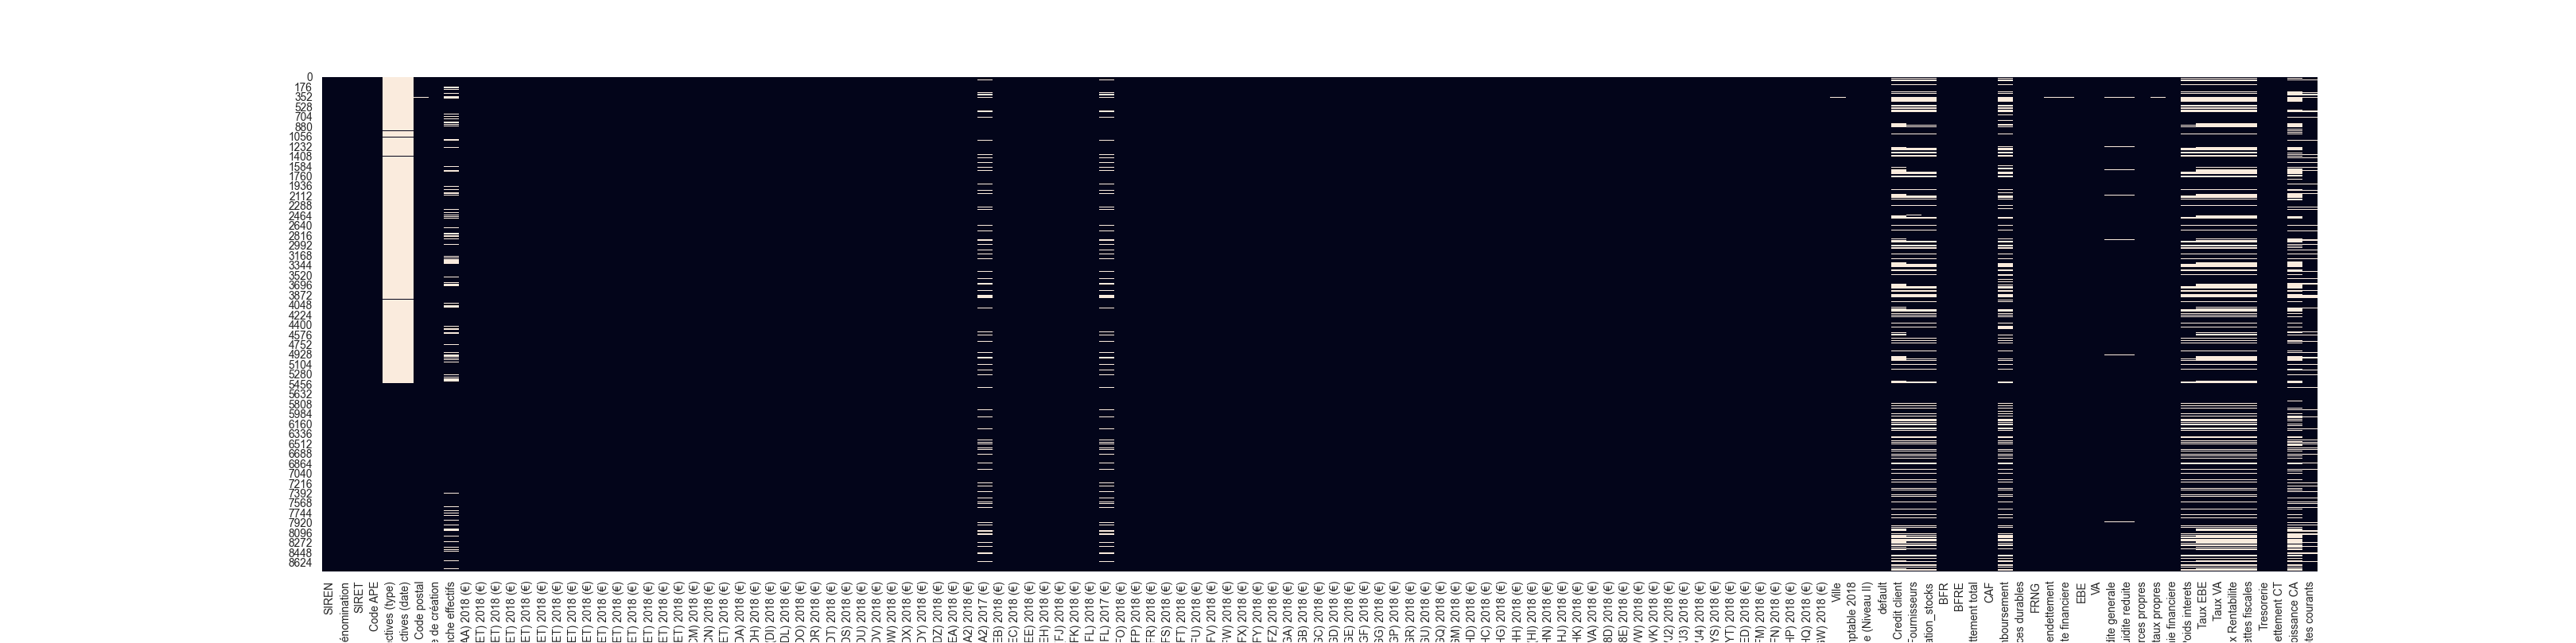

/Users/marie/.pyenv/versions/3.9.5/envs/simplon/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning:

Glyph 8208 missing from current font.

/Users/marie/.pyenv/versions/3.9.5/envs/simplon/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning:

Glyph 8208 missing from current font.



<AxesSubplot:>

In [219]:
# heatmap des valeurs manquantes (en blanc)
plt.figure(figsize=(40,10))
sns.heatmap(df.isna(), cbar=False)

In [221]:
# total de NaN sur le dataset
df.isna().sum().sum()/(df.shape[0]*df.shape[1])*100

3.4746555152324143

In [222]:
# taux de NaN par colonne
(df.isna().sum()/df.shape[0]).sort_values(ascending=False)

Procédures collectives (type)                                                                          0.61248
Procédures collectives (date)                                                                          0.61248
Croissance CA                                                                                          0.35679
Credit client                                                                                          0.29520
Poids dettes fiscales                                                                                  0.29520
Taux Rentabilite                                                                                       0.29520
Taux VA                                                                                                0.29520
Taux EBE                                                                                               0.29520
Capacite de remboursement                                                                              0.25296
C

### Focus sur les entreprises avec un CA null
- 2593 entreprises avec CA null 
- Les ratios calculés sur la base du CA sont donc NaN 
- Si on supprime ces entreprises, ça n'a pas d'impact sur la ventilation des entreprises selon la target (stable à 38% de défaillantes :

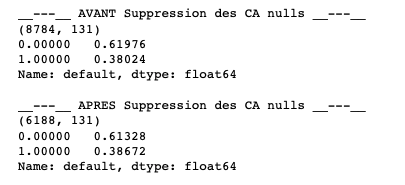

- Est-ce pertinent de garder ces entreprises ? Comment reformuler cette question ? 
    - Est ce que la distribution (entre des entreprises ayant un CA nul et celle n'en ayant pas est significativement différente ?
    
- Décision est prise de les supprimer car sur le plan économique c'est aussi justifié.
- Ca permet de faire passer le dataset de 3,47 à 1,45% de NaN

In [223]:
df_CA_not_null = df[df["Chiffre d'affaires net (Total) (FL) 2018 (€)"] > 0]

In [224]:
(df["Chiffre d'affaires net (Total) (FL) 2018 (€)"] == 0).sum()

2593

In [225]:
df_CA_not_null.shape

(6188, 131)

In [226]:
print("__---__ AVANT Suppression des CA nulls __---__")
print(df.shape)
print(df['default'].value_counts()/df.shape[0])

print("\n__---__ APRES Suppression des CA nulls __---__")
print(df_CA_not_null.shape)
print(df_CA_not_null['default'].value_counts()/df_CA_not_null.shape[0])

__---__ AVANT Suppression des CA nulls __---__
(8784, 131)
0.00000   0.61976
1.00000   0.38024
Name: default, dtype: float64

__---__ APRES Suppression des CA nulls __---__
(6188, 131)
0.00000   0.61328
1.00000   0.38672
Name: default, dtype: float64


In [227]:
# total de NaN sur le dataset après suppression des CA nulls
df_CA_not_null.isna().sum().sum()/(df_CA_not_null.shape[0]*df_CA_not_null.shape[1])*100

1.4525775078087606

In [228]:
# taux de NaN par colonne
(df_CA_not_null.isna().sum()/df_CA_not_null.shape[0]).sort_values(ascending=False)

Procédures collectives (type)                                                                          0.60617
Procédures collectives (date)                                                                          0.60617
Croissance CA                                                                                          0.15304
Tranche effectifs                                                                                      0.13219
Apport en comptes courants                                                                             0.12056
dont comptes courants d'associés de l'exercice N (EA2) 2017 (€)                                        0.12056
Chiffre d'affaires net (Total) (FL) 2017 (€)                                                           0.12056
Capacite de remboursement                                                                              0.02909
Liquidite reduite                                                                                      0.00485
L

### Focus sur les colonnes avec plus de 3% de NaN (gap entre 3% et 12% de NaN)
- Procédures collectives (type)                                                                          0.60617 => supprimer la colonne
- Procédures collectives (date)                                                                          0.60617 => supprimer la colonne
- Croissance CA                                                                                          0.15304 => supprimer la colonne (vient de l'absence d'info sur CA 2017)
- Tranche effectifs                                                                                      0.13219 => voir si imputation intéressante (plus fréquent). Sinon supprimer la colonne
- Apport en comptes courants                                                                             0.12056 => supprimer la colonne (vient de l'absence d'info sur CCA 2017)
- dont comptes courants d'associés de l'exercice N (EA2) 2017 (€)                                        0.12056 => supprimer la colonne
- Chiffre d'affaires net (Total) (FL) 2017 (€)                                                           0.12056 => supprimer la colonne

# Deuxième passe de modification des données
## Suppression des lignes avec un CA null

In [229]:
def suppr_nulls_nans(df):
    # suppression des entreprises avec CA null
    df = df[df["Chiffre d'affaires net (Total) (FL) 2018 (€)"] > 0]
    # suppression des colonnes avec plus de 12% de NaN (sauf tranche d'effectif)
    cols_null_to_drop = ["Procédures collectives (type)", 
                         "Procédures collectives (date)", 
                         "Croissance CA", 
                         "Apport en comptes courants", 
                         "dont comptes courants d'associés de l'exercice N (EA2) 2017 (€)", 
                         "Chiffre d'affaires net (Total) (FL) 2017 (€)"]
    df = df.drop(cols_null_to_drop, axis=1)
    return df

In [230]:
df = suppr_nulls_nans(df)

## Modifications du DF relatives aux catégories prenant trop de modalités

### Merge avec données NAF
Suite à l'analyse des variables catégorielles : 507 valeurs uniques. L'objectif est de réduire le nombre de modalités en travaillant à un niveau moins fin

In [231]:
def merge_naf(df, naf_path):
    df_naf = pd.read_excel(naf_path, header=[1])
    df_naf = df_naf.drop(["Unnamed: 10", "Unnamed: 11", "Unnamed: 12", "Unnamed: 13", "Unnamed: 14", "Unnamed: 15",
            "Unnamed: 16", "Unnamed: 17", "Unnamed: 18", "Unnamed: 19", "Unnamed: 20", "Unnamed: 21", "Unnamed: 22"], axis=1)
    df_naf = df_naf.rename(columns={'Unnamed: 1':'Descriptif A 732'})
    # Step 1 - suppression des points dans la colonne A 732
    # pour avoir le même format que dans les données d'entreprises
    for row in range(df_naf.shape[0]):
        df_naf.loc[row,'A 732'] = df_naf.loc[row,'A 732'].replace('.', '')
    # Step 2 - Join avec le dataset d'entreprises 
    # (pour la mise en DB, il faudra créér deux tables et faire les joins dans la requête SQL)
    df_merged = pd.merge(df, df_naf, how = 'left', left_on = df['Code APE'], right_on = df_naf['A 732'])
    df_merged = df_merged.drop(['key_0'], axis=1)
    assert df_merged.shape[0]==df.shape[0]
    assert df_merged.shape[1]==df.shape[1]+df_naf.shape[1]
    return df_merged, df_naf

In [232]:
df, df_naf = merge_naf(df, naf_path="../data/data_used/table_nAF2-NA.xls")

### Date de création => rajout d'une colonne sur l'âge
Date de création initialement en catégorie. Passée en date, et utilisation pour calculer l'âge au 31/12/2019

In [233]:
import datetime
def ajout_col_age(df):
    df["Date de création"] = pd.to_datetime(df["Date de création"])
    df["Age entreprise"] = ((datetime.datetime(2019,12,31) - df["Date de création"])/np.timedelta64(1, 'M'))
    df["Age entreprise"] = df["Age entreprise"].astype(int)
    return df

In [234]:
df = ajout_col_age(df)

### Effectif moyen => passage en ordinal

In [235]:
def effectif_encoder(df):
    dic_effectif = { "0 salarié pendant l'année" : 0
                , "0 salarié à la fin de l'année" : 1
                , "De 1 à 2 salariés" : 2
                , "De 3 à 5 salariés" : 3
                , "De 6 à 9 salariés" : 4
                , "De 10 à 19 salariés" : 5
                , "De 20 à 49 salariés" : 6
                , "De 50 à 99 salariés" : 7
                , "De 100 à 199 salariés" : 8
                , "De 200 à 249 salariés" : 9
                , "De 250 à 499 salariés" : 10
                , "De 500 à 999 salariés" : 11
                , "De 1000 à 1999 salariés" : 12
                , "De 2000 à 4999 salariés" : 13 
    }
    df["Tranche effectifs"] = df["Tranche effectifs"].map(dic_effectif)
    return df

In [236]:
df = effectif_encoder(df)

### Définition des catégories de colonnes

In [237]:
target_col = ['default']

In [238]:
#naf_cols = df_naf.columns.to_list()
naf_cols = ['A 732',
 'Descriptif A 732',
 'A 615',
 'A 272',
 'A 129',
 'A 88',
 'A 64',
 'A 38',
 'A 21',
 'A 10']
naf_cols_to_drop = ['A 732',
 'Descriptif A 732',
 'A 615',
 'A 272',
 'A 129',
 'A 88',
 'A 64',
 'A 38']
naf_cols_to_keep = [col for col in naf_cols if col not in naf_cols_to_drop]
naf_cols_to_keep

['A 21', 'A 10']

In [239]:
general_cols = ['SIREN', 
           'Dénomination', 
           'SIRET', 
           'Code APE', 
           'Procédures collectives (type)', 
           'Procédures collectives (date)', 
           'Code postal', 
           'Date de création', 
            'Age entreprise', 
           'Tranche effectifs', 
           'Catégorie juridique (Niveau I)', 
           'Ville', 
           "Nombre de mois de l'exercice comptable 2018", 
           'Notation NOTA-PME 2018', 
           'Catégorie juridique (Niveau II)',
            'Effectif moyen du personnel (YP) 2018']

general_cols_to_drop = ['SIREN', 
           'Dénomination', 
           'SIRET', 
           'Code APE', # présent dans les colonnes NAF (A 732)            
           'Procédures collectives (type)', 
           'Procédures collectives (date)', 
           'Code postal', # à reprendre après pour analyse géographique
           'Date de création', 
           'Ville',
                        
           'Notation NOTA-PME 2018', 
            'Catégorie juridique (Niveau I)',
           'Catégorie juridique (Niveau II)',
            'Effectif moyen du personnel (YP) 2018']

general_cols_to_keep = [col for col in general_cols if col not in general_cols_to_drop]
general_cols_to_keep

['Age entreprise',
 'Tranche effectifs',
 "Nombre de mois de l'exercice comptable 2018"]

In [240]:
# 2018 ok
important_cols = ['TOTAL (I) (DL) 2018 (€)',
                    "Chiffre d'affaires net (Total) (FL) 2018 (€)",
                    '3 - RESULTAT COURANT AVANT IMPOTS (I - II + III - IV + V - VI) (GW) 2018 (€)',
                    'TOTAL GENERAL(I à VI) (net) (CONET) 2018 (€)']

In [241]:
# 2018 ok
bilan_cols = ['Capital souscrit non appelé (I) (AA) 2018 (€)', 
         'TOTAL (II) (net) (BJNET) 2018 (€)', 
         'Matières premières, approvisionnements (net) (BLNET) 2018 (€)', 
         'En cours de production de biens (net) (BNNET) 2018 (€)', 
         'En cours de production de services (net) (BPNET) 2018 (€)', 
         'Produits intermédiaires et finis (net) (BRNET) 2018 (€)', 
         'Marchandises (net) (BTNET) 2018 (€)', 
         'Avances et acomptes versés sur commandes (net) (BVNET) 2018 (€)', 
         'Clients et comptes rattachés (3) (net) (BXNET) 2018 (€)', 
         'Autres créances (3) (net) (BZNET) 2018 (€)', 
         'Capital souscrit et appelé, non versé (net) (CBNET) 2018 (€)', 
         'Valeurs mobilières de placement (net) (CDNET) 2018 (€)', 
         'Disponibilités (net) (CFNET) 2018 (€)', 
         "Charges constatées d'avance (3) (net) (CHNET) 2018 (€)", 
         'TOTAL (III) (net) (CJNET) 2018 (€)', 
         'Primes de remboursement des obligations (CM) 2018 (€)', 
         'Ecarts de conversion actif (CN) 2018 (€)', 
         'TOTAL GENERAL(I à VI) (net) (CONET) 2018 (€)', 
         'Capital social ou individuel (1) (DA) 2018 (€)', 
         'Report à nouveau (DH) 2018 (€)', 
         "RESULTAT DE L'EXERCICE (bénéfice ou perte) (DI) 2018 (€)", 
         'TOTAL (I) (DL) 2018 (€)', 
         'TOTAL(II) (DO) 2018 (€)', 
         'TOTAL (III) (DR) 2018 (€)', 
         'Autres emprunts obligataires (DT) 2018 (€)', 
         'Emprunts obligataires convertibles (DS) 2018 (€)', 
         'Emprunts et dettes auprès des établissements de crédit (5) (DU) 2018 (€)', 
         'Emprunts et dettes financières divers (DV) 2018 (€)', 
         'Avances et acomptes reçus sur commandes en cours (DW) 2018 (€)', 
         'Dettes fournisseurs et comptes rattachés (DX) 2018 (€)', 
         'Dettes fiscales et sociales (DY) 2018 (€)', 
         'Dettes sur immobilisations et comptes rattachés (DZ) 2018 (€)', 
         'Autres dettes (EA) 2018 (€)', 
         "dont comptes courants d'associés de l'exercice N (EA2) 2018 (€)", 
         "Produits constatés d'avance (EB) 2018 (€)", 
         'TOTAL (IV) (EC) 2018 (€)', 
         'TOTAL GENERAL (I à V) (EE) 2018 (€)', 
         '(5)\xa0Dont concours bancaires courants, et soldes créditeurs de banques et CCP (EH) 2018 (€)',
         'Ecarts de conversion passif (V) (ED) 2018 (€)']

In [242]:
# 2018 OK
cdr_cols = ["Chiffre d'affaires net (France) (FJ) 2018 (€)", 
       "Chiffre d'affaires net (Exportations et livraisons intracommunautaires) (FK) 2018 (€)", 
       "Chiffre d'affaires net (Total) (FL) 2018 (€)", 
       "Subventions d'exploitation (FO) 2018 (€)", 
       'Reprises sur amortissements et provisions, transferts de charges (9) (FP) 2018 (€)', 
       "Total des produits d'exploitation (2) (I) (FR) 2018 (€)", 
       'Achats de marchandises (y compris droits de douane) (FS) 2018 (€)', 
       'Variation de stock (marchandises) (FT) 2018 (€)', 
       'Achats de matières premières et autres approvisionnements (y compris droits de douane) (FU) 2018 (€)', 
       'Variation de stock (matières premières et approvisionnements) (FV) 2018 (€)', 
       'Autres achats et charges externes (3) (6 bis) (FW) 2018 (€)', 
       'Impôts, taxes et versements assimilés (FX) 2018 (€)', 
       'Salaires et traitements (FY) 2018 (€)', 
       'Charges sociales (10) (FZ) 2018 (€)', 
       "Dotations d'exploitation sur immobilisations (dotations aux amortissements) (GA) 2018 (€)", 
       "Dotations d'exploitation sur immobilisations (dotations aux provisions) (GB) 2018 (€)", 
       "Dotations d'exploitation sur actif circulant (dotations aux provisions) (GC) 2018 (€)", 
       "Dotations d'exploitation pour risques et charges (dotations aux provisions) (GD) 2018 (€)", 
       'Autres charges (12) (GE) 2018 (€)', 
       "Total des charges d'exploitation (4) (II) (GF) 2018 (€)", 
       "1 - RESULTAT D'EXPLOITATION (I - II) (GG) 2018 (€)", 
       'Total des produits financiers (V) (GP) 2018 (€)', 
       'Intérêts et charges assimilées (GR) 2018 (€)', 
       'Total des charges financières (VI) (GU) 2018 (€)', 
       'Dotations financières aux amortissements et provisions (GQ) 2018 (€)', 
       'Reprises sur provisions & transferts de charges (GM) 2018 (€)', 
       'Total des produits exceptionnels (VII) (HD) 2018 (€)', 
       'Reprises sur provisions & transferts de charges (HC) 2018 (€)', 
       'Dotations exceptionnelles aux amortissements et provisions (6 ter) (HG) 2018 (€)', 
       'Total des charges exceptionnelles (VIII) (HH) 2018 (€)', 
       '4 - RESULTAT EXCEPTIONNEL (VII - VIII) (HI) 2018 (€)', 
       '5 - BENEFICE OU PERTE (Total des produits - total des charges) (HN) 2018 (€)', 
       "Participation des salariés aux résultats de l'entreprise (HJ) 2018 (€)", 
       'Impôts sur les bénéfices (HK) 2018 (€)',
       'Production stockée (FM) 2018 (€)', 
       'Production immobilisée (FN) 2018 (€)',
       '(3)\xa0Dont Crédit-bail mobilier (HP) 2018 (€)', 
       '(3)\xa0Dont Crédit-bail immobilier (HQ) 2018 (€)', 
       '3 - RESULTAT COURANT AVANT IMPOTS (I - II + III - IV + V - VI) (GW) 2018 (€)']

In [243]:
# 2018 OK
annexes_cols = ['Clients douteux ou litigieux - Montant brut (VA) 2018 (€)', 
           'Sécurité sociale et autres organismes sociaux - Montant brut (8D) 2018 (€)', 
           'Impôts sur les bénéfices - Montant brut (8E) 2018 (€)', 
           'T.V.A. - Montant brut (VW) 2018 (€)', 
           'Emprunts remboursés en cours d’exercice (VK) 2018 (€)', 
           'Emprunts souscrits en cours d’exercice - à 1 an au plus (VJ2) 2018 (€)', 
           "Emprunts souscrits en cours d’exercice - à plus d'un an et 5 ans au plus (VJ3) 2018 (€)", 
           'Emprunts souscrits en cours d’exercice - à plus de 5 ans (VJ4) 2018 (€)', 
           'Effets portés à l’escompte et non échus (YS) 2018 (€)', 
           'Sous‐traitance (YT) 2018 (€)']

In [244]:
# seulement les éléments comparables quelle que soit la taille (ratios)
ratios_cols = ['Credit client',
 'Credit Fournisseurs',
 'Rotation_stocks',
 'Capacite de remboursement',
 'Taux endettement',
 'Rentabilite financiere',
 'Taux ressources propres',
 'Rentabilite des capitaux propres',
 'Autonomie financiere',
 'Poids interets',
 'Taux EBE',
 'Taux VA',
 'Taux Rentabilite',
 'Poids dettes fiscales',
 'Taux augmentation endettement CT',
 'Croissance CA',
 'Apport en comptes courants']

In [245]:
aggregats_cols = ['BFR',
 'BFRE',
 'Endettement total',
 'CAF',
 'Ressources durables',
 'FRNG',
 'EBE',
 'VA',
 'Liquidite generale',
 'Liquidite reduite',
 'Tresorerie',
]

In [246]:
cols_to_keep = (ratios_cols 
                + aggregats_cols
                + target_col 
                + general_cols_to_keep 
                + important_cols
                + naf_cols_to_keep)
print(len(cols_to_keep))

38


# Préparation de la modélisation
## Train test split

In [247]:
#### Train test split

from sklearn.model_selection import train_test_split

# on peut dans un premier temps séparer en 2 le dataset :
trainset, testset = train_test_split(df, test_size=0.2, random_state=0)

# on vérifie que la distribution de la target reste OK dans les test et train set => c'est OK
trainset['default'].value_counts(normalize=True)

testset['default'].value_counts(normalize=True)




0.00000   0.61066
1.00000   0.38934
Name: default, dtype: float64

## Fonction d'évaluation des modèles

In [248]:
from sklearn.metrics import f1_score, confusion_matrix, classification_report
# la learning curve est indispensable pour identifier l'over ou l'under fitting
from sklearn.model_selection import learning_curve

def evaluate(model, X_train, y_train, X_test, y_test):
    
    # on entraine le modèle
    model.fit(X_train, y_train)
    # on fait les predictions
    y_pred = model.predict(X_test)
    
    # on fait la confusion_matrix
    conf = pd.DataFrame(confusion_matrix(y_test, y_pred))
    conf = conf.rename(columns={0: 'Predicted 0',1:'Predicted 1'})
    conf = conf.rename(index={0: 'Actual 0',1:"Actual 1"})
    conf["TOTAL"] = conf["Predicted 0"]+conf["Predicted 1"]
    conf = conf.append(pd.Series(conf.sum(axis=0), name="TOTAL"))

    
    print("__---__ CONFUSION MATRIX __---__")
    print(conf)
    print("\n__---__ CLASSIFICATION REPORT __---__")
    print(classification_report(y_test, y_pred))
    
    N, train_score, val_score = learning_curve(model, X_train, y_train,
                                              cv=4, scoring='f1',
                                               train_sizes=np.linspace(0.1, 1, 10))
    
    # on visualise ca dans un graphique
    plt.figure(figsize=(12, 8))
    # évolu du train_score en fonction du nombre d'échantillons (N)
    # on prend le score_mean car on est en cross-val
    plt.plot(N, train_score.mean(axis=1), label='train score')
    plt.plot(N, val_score.mean(axis=1), label='validation score')
    plt.legend()

# Exemple d'usage :    
#X1_train = trainset[["A 21 encoded"]]
#y1_train = trainset["default"]
#X1_test = testset[["A 21 encoded"]]
#y1_test = testset["default"]
# model = LogisticRegression()

#evaluate(model)    

# EDA - Analyse de forme

 Analyse de Forme :
- **variable target** : default (1 si défaillante, 0 sinon)
- **variables catégorielles** :On ne conserve que la catégorie juridique, après avoir fait un crosstab pour valider la pertinence de l'information.

## Variables catégorielles
- Tranche effectif => encodage ordinal (fait par dictionnaire, il faudra ensuite le refaire avec un ordinal encoder)
- Code A 21 => encodage ordinal
- Catégorie juridique => prévoir encodage one hot (11 modalités)
- Toutes les autres variables catégorielles => à supprimer

## Variables numériques
- 

In [299]:
df.describe()

SIREN                SIRET  Code postal  Tranche effectifs  Capital souscrit non appelé (I) (AA) 2018 (€)  TOTAL (II) (net) (BJNET) 2018 (€)  Matières premières, approvisionnements (net) (BLNET) 2018 (€)  En cours de production de biens (net) (BNNET) 2018 (€)  En cours de production de services (net) (BPNET) 2018 (€)  Produits intermédiaires et finis (net) (BRNET) 2018 (€)  Marchandises (net) (BTNET) 2018 (€)  Avances et acomptes versés sur commandes (net) (BVNET) 2018 (€)  Clients et comptes rattachés (3) (net) (BXNET) 2018 (€)  Autres créances (3) (net) (BZNET) 2018 (€)  Capital souscrit et appelé, non versé (net) (CBNET) 2018 (€)  Valeurs mobilières de placement (net) (CDNET) 2018 (€)  Disponibilités (net) (CFNET) 2018 (€)  Charges constatées d'avance (3) (net) (CHNET) 2018 (€)  TOTAL (III) (net) (CJNET) 2018 (€)  Primes de remboursement des obligations (CM) 2018 (€)  Ecarts de conversion actif (CN) 2018 (€)  TOTAL GENERAL(I à VI) (net) (CONET) 2018 (€)  \
count      6188.00000           6188.00000   6186.00000         5370.00000                                     6188.00000                         6188.00000                                         6188.00000                                                     6188.00000                                              6188.00000                                                 6188.00000                                 6188.00000                                         6188.00000                                                       6188.00000                                        6188.00000                                         6188.00000                                                    6188.00000                                  6188.00000                                         6188.00000                               6188.00000                                         6188.00000                                    6188.00000                                    6188.00000   
mean  536194033.95184 53619403395211.07812  56432.86987            2.93520                                       76.64253                      1183160.12314                                        52334.89350                                                    32882.66031                                              3683.29573                                                31496.06787                               140287.05414                                        12229.95152                                                     333379.68697                                      435075.96622                                           68.47366                                                   37243.97786                                169358.75727                                        17626.28151                            1269805.82062                                          968.08306                                    4665.13494                                 2580433.63946   
std   163714439.66762 16371443966756.02148  28793.34421            1.96465                                     4040.19324                     17844374.97545                                       448983.95959                                                   468590.90308                                             77844.38130                                               590276.66709                              2756503.66518                                       269443.29055                                                    1514700.83423                                     5051390.09823                                         4711.54117                                                  431699.16926                                850297.27565                                       167744.13717                            7962745.50263                                        59097.52638                                  230385.41296                                24772590.20246   
min     5520242.00000   552024200016.00000   1000.00000 

In [45]:
for col in df.select_dtypes(np.number):
    print(col)

SIREN
SIRET
Code postal
Tranche effectifs
Capital souscrit non appelé (I) (AA) 2018 (€)
TOTAL (II) (net) (BJNET) 2018 (€)
Matières premières, approvisionnements (net) (BLNET) 2018 (€)
En cours de production de biens (net) (BNNET) 2018 (€)
En cours de production de services (net) (BPNET) 2018 (€)
Produits intermédiaires et finis (net) (BRNET) 2018 (€)
Marchandises (net) (BTNET) 2018 (€)
Avances et acomptes versés sur commandes (net) (BVNET) 2018 (€)
Clients et comptes rattachés (3) (net) (BXNET) 2018 (€)
Autres créances (3) (net) (BZNET) 2018 (€)
Capital souscrit et appelé, non versé (net) (CBNET) 2018 (€)
Valeurs mobilières de placement (net) (CDNET) 2018 (€)
Disponibilités (net) (CFNET) 2018 (€)
Charges constatées d'avance (3) (net) (CHNET) 2018 (€)
TOTAL (III) (net) (CJNET) 2018 (€)
Primes de remboursement des obligations (CM) 2018 (€)
Ecarts de conversion actif (CN) 2018 (€)
TOTAL GENERAL(I à VI) (net) (CONET) 2018 (€)
Capital social ou individuel (1) (DA) 2018 (€)
Report à nouveau 

In [21]:
import plotly.express as px
fig = px.histogram(df, x=df["Capital social ou individuel (1) (DA) 2018 (€)"], color="default", nbins=6000, histnorm='probability density', marginal="box")
fig.update_traces(opacity=0.6)
fig.show()

In [62]:
df["Capital souscrit non appelé (I) (AA) 2018 (€)"].describe()

count   0.00000
mean        NaN
std         NaN
min         NaN
25%         NaN
50%         NaN
75%         NaN
max         NaN
Name: Capital souscrit non appelé (I) (AA) 2018 (€), dtype: float64

In [63]:
df

Empty DataFrame
Columns: [SIREN, Dénomination, SIRET, Code APE, Code postal, Date de création, Tranche effectifs, Capital souscrit non appelé (I) (AA) 2018 (€), TOTAL (II) (net) (BJNET) 2018 (€), Matières premières, approvisionnements (net) (BLNET) 2018 (€), En cours de production de biens (net) (BNNET) 2018 (€), En cours de production de services (net) (BPNET) 2018 (€), Produits intermédiaires et finis (net) (BRNET) 2018 (€), Marchandises (net) (BTNET) 2018 (€), Avances et acomptes versés sur commandes (net) (BVNET) 2018 (€), Clients et comptes rattachés (3) (net) (BXNET) 2018 (€), Autres créances (3) (net) (BZNET) 2018 (€), Capital souscrit et appelé, non versé (net) (CBNET) 2018 (€), Valeurs mobilières de placement (net) (CDNET) 2018 (€), Disponibilités (net) (CFNET) 2018 (€), Charges constatées d'avance (3) (net) (CHNET) 2018 (€), TOTAL (III) (net) (CJNET) 2018 (€), Primes de remboursement des obligations (CM) 2018 (€), Ecarts de conversion actif (CN) 2018 (€), TOTAL GENERAL(I à VI) (net) (CONET) 2018 (€), Capital social ou individuel (1) (DA) 2018 (€), Report à nouveau (DH) 2018 (€), RESULTAT DE L'EXERCICE (bénéfice ou perte) (DI) 2018 (€), TOTAL (I) (DL) 2018 (€), TOTAL(II) (DO) 2018 (€), TOTAL (III) (DR) 2018 (€), Autres emprunts obligataires (DT) 2018 (€), Emprunts obligataires convertibles (DS) 2018 (€), Emprunts et dettes auprès des établissements de crédit (5) (DU) 2018 (€), Emprunts et dettes financières divers (DV) 2018 (€), Avances et acomptes reçus sur commandes en cours (DW) 2018 (€), Dettes fournisseurs et comptes rattachés (DX) 2018 (€), Dettes fiscales et sociales (DY) 2018 (€), Dettes sur immobilisations et comptes rattachés (DZ) 2018 (€), Autres dettes (EA) 2018 (€), dont comptes courants d'associés de l'exercice N (EA2) 2018 (€), Produits constatés d'avance (EB) 2018 (€), TOTAL (IV) (EC) 2018 (€), TOTAL GENERAL (I à V) (EE) 2018 (€), (5) Dont concours bancaires courants, et soldes créditeurs de banques et CCP (EH) 2018 (€), Chiffre d'affaires net (France) (FJ) 2018 (€), Chiffre d'affaires net (Exportations et livraisons intracommunautaires) (FK) 2018 (€), Chiffre d'affaires net (Total) (FL) 2018 (€), Subventions d'exploitation (FO) 2018 (€), Reprises sur amortissements et provisions, transferts de charges (9) (FP) 2018 (€), Total des produits d'exploitation (2) (I) (FR) 2018 (€), Achats de marchandises (y compris droits de douane) (FS) 2018 (€), Variation de stock (marchandises) (FT) 2018 (€), Achats de matières premières et autres approvisionnements (y compris droits de douane) (FU) 2018 (€), Variation de stock (matières premières et approvisionnements) (FV) 2018 (€), Autres achats et charges externes (3) (6 bis) (FW) 2018 (€), Impôts, taxes et versements assimilés (FX) 2018 (€), Salaires et traitements (FY) 2018 (€), Charges sociales (10) (FZ) 2018 (€), Dotations d'exploitation sur immobilisations (dotations aux amortissements) (GA) 2018 (€), Dotations d'exploitation sur immobilisations (dotations aux provisions) (GB) 2018 (€), Dotations d'exploitation sur actif circulant (dotations aux provisions) (GC) 2018 (€), Dotations d'exploitation pour risques et charges (dotations aux provisions) (GD) 2018 (€), Autres charges (12) (GE) 2018 (€), Total des charges d'exploitation (4) (II) (GF) 2018 (€), 1 - RESULTAT D'EXPLOITATION (I - II) (GG) 2018 (€), Total des produits financiers (V) (GP) 2018 (€), Intérêts et charges assimilées (GR) 2018 (€), Total des charges financières (VI) (GU) 2018 (€), Dotations financières aux amortissements et provisions (GQ) 2018 (€), Reprises sur provisions & transferts de charges (GM) 2018 (€), Total des produits exceptionnels (VII) (HD) 2018 (€), Reprises sur provisions & transferts de charges (HC) 2018 (€), Dotations exceptionnelles aux amortissements et provisions (6 ter) (HG) 2018 (€), Total des charges exceptionnelles (VIII) (HH) 2018 (€), 4 - RESULTAT EXCEPTIONNEL (VII - VIII) (HI) 2018 (€), 5 - BENEFICE OU PERTE (Total des produits - total des charges) (HN) 2018 (€), Partici

# Troisième passe de modification des données : suppression des outliers et des colonnes totalement inutiles


## Suppression des colonnes inutiles
- Codes NAF : on ne garde que l'A 21 suite à étude réalisée
- Dénomination, CSIRET, SIREN, Ville, Code postal n'apportent pas d'information
- Emprunts souscris / remboursés au cours de l'exercice : trop de valeurs manquantes

In [278]:
def remove_useless_cols(df):
    useless_cols = [
        "Dénomination",
        "Tranche effectifs",
        "Code APE",
        "Ville",
        "Emprunts remboursés en cours d’exercice (VK) 2018 (€)",
        "Descriptif A 732",
        "A 732",
        "A 615",
        "A 272",
        "A 129",
        "A 88",
        "A 64",
        "A 38",
        "A 10",
        "SIREN",
        "SIRET",
        "Code postal",
        "Emprunts souscrits en cours d’exercice - à 1 an au plus (VJ2) 2018 (€)",
        "Emprunts souscrits en cours d’exercice - à plus d'un an et 5 ans au plus (VJ3) 2018 (€)",
        "Emprunts souscrits en cours d’exercice - à plus de 5 ans (VJ4) 2018 (€)"
    ]
    
    df = df.drop(useless_cols, axis=1)
    return df

**Vérification de l'intérêt de la colonne Catégorie juridique dans les variables catégorielles**

In [98]:
pd.crosstab(eda['default'], df['Catégorie juridique (Niveau II)'], normalize='columns')

Catégorie juridique (Niveau II)  Autre personne morale de droit privé  Entrepreneur individuel  Personne morale de droit étranger, immatriculée au RCS (registre du commerce et des sociétés)  Société anonyme à conseil d'administration  Société anonyme à directoire  Société civile  Société coopérative agricole  Société en commandite  Société en nom collectif  Société par actions simplifiée  Société à responsabilité limitée (SARL)
default                                                                                                                                                                                                                                                                                                                                                                                                                                        
0.00000                                                       1.00000                  0.83333                                            1.00000                                                                                 0.39130                       0.46667         0.91667                       0.50000                0.02703                   0.88095                         0.49943                                  0.66835
1.00000                                                       0.00000                  0.16667                                            0.00000                                                                                 0.60870                       0.53333         0.08333                       0.50000                0.97297                   0.11905                         0.50057                                  0.33165

In [97]:
pd.crosstab(eda['default'], df['Catégorie juridique (Niveau II)'], margins=True, margins_name="Total")

Catégorie juridique (Niveau II)  Autre personne morale de droit privé  Entrepreneur individuel  Personne morale de droit étranger, immatriculée au RCS (registre du commerce et des sociétés)  Société anonyme à conseil d'administration  Société anonyme à directoire  Société civile  Société coopérative agricole  Société en commandite  Société en nom collectif  Société par actions simplifiée  Société à responsabilité limitée (SARL)  Total
default                                                                                                                                                                                                                                                                                                                                                                                                                                               
0.0                                                                 1                       35                                                  2                                                                                      54                             7              11                             1                      1                        37                             873                                     2773   3795
1.0                                                                 0                        7                                                  0                                                                                      84                             8               1                             1                     36                         5                             875                                     1376   2393
Total                                                               1                       42                                                  2                                                                                     138                            15              12                             2                     37                        42                            1748                                     4149   6188

## Suppression des outliers

Après examen visuel des distributions, on remarque qu'il y a toujours quelques valeurs très extrêmes. On décide de ne supprimer que les valeurs les plus extrêmes, à plus ou moins 20 écart type de la moyenne.

In [273]:
def count_outliers(df, col):
    mean = np.mean(df[col], axis=0)
    sd = np.std(df[col], axis=0)
    minimum = mean - 20 * sd
    maximum = mean + 20 * sd
    df_outliers = df.loc[(df[col] <= minimum) | (df[col] >= maximum)]
    return df_outliers.shape[0]

def remove_outliers(df, col):
    mean = np.mean(df[col], axis=0)
    sd = np.std(df[col], axis=0)
    minimum = mean - 20 * sd
    maximum = mean + 20 * sd
    df = df.loc[(df[col] > minimum) & (df[col] < maximum)]
    return df

In [279]:
df2 = remove_useless_cols(df)

In [281]:
# suppression des outliers de +- 20 écart type : on passe de 6188 à 5740
for col in df2.select_dtypes(np.number):
    df2 = remove_outliers_v2(df2, col)
    print(col, df2.shape[0])

Capital souscrit non appelé (I) (AA) 2018 (€) 6186
TOTAL (II) (net) (BJNET) 2018 (€) 6185
Matières premières, approvisionnements (net) (BLNET) 2018 (€) 6181
En cours de production de biens (net) (BNNET) 2018 (€) 6179
En cours de production de services (net) (BPNET) 2018 (€) 6177
Produits intermédiaires et finis (net) (BRNET) 2018 (€) 6174
Marchandises (net) (BTNET) 2018 (€) 6173
Avances et acomptes versés sur commandes (net) (BVNET) 2018 (€) 6171
Clients et comptes rattachés (3) (net) (BXNET) 2018 (€) 6169
Autres créances (3) (net) (BZNET) 2018 (€) 6165
Capital souscrit et appelé, non versé (net) (CBNET) 2018 (€) 6164
Valeurs mobilières de placement (net) (CDNET) 2018 (€) 6162
Disponibilités (net) (CFNET) 2018 (€) 6159
Charges constatées d'avance (3) (net) (CHNET) 2018 (€) 6156
TOTAL (III) (net) (CJNET) 2018 (€) 6154
Primes de remboursement des obligations (CM) 2018 (€) 6153
Ecarts de conversion actif (CN) 2018 (€) 6152
TOTAL GENERAL(I à VI) (net) (CONET) 2018 (€) 6150
Capital social o

## Première identification des variables les plus explicatives / de celles à supprimer
- Calcul des corrélations avec la target. 
    - **CODES APE**
        - On voit que les **codes d'activité** semblent être ordonnés et semblent avoir un impact sur la probabilité de défault. Ils se démarquent nettement des autres données chiffrées et méritent qu'on se focalise un peu plus dessus.
        - On cherche à tester cette hypothèse avec des visualisations sur les distributions de ces variables selon la target. 
        - On réalise plusieurs crosstabs pour identifier la distribution des 0/1 au sein de chaque code. On fait ça à plusieurs niveaux de granularité, pour finalement sélectionner le niveau de l'A 21 comme étant un bon compromis entre nombre de modalités et capacité à discriminer les défaillantes des saines. 
        - On décide dans un premier temps d'encoder ordinalement cette catégorie, en effectuant un tri sur le % de défaillantes dans chaque modalité. On arrive alors à un coefficient de corrélation très intéressant : Mais, pour éviter le data leakage, il faudra tester également le one hot encoder.
        - On voit notamment que les entreprises des industries manufacturières sont nettement plus nombreuses dans le camp des défaillantes.
   - **Dettes fiscales et sociales**
       - Graphiques permettent de voir les différences de distributions selon la défaillance.
       - A voir si on conserve le montant ou si on utilise le taux. Les résultats sont compliqués à interpréter.

In [40]:
corr = df.corr()

In [41]:
corr['default'].sort_values()

A 88                                                                                                   -0.12514
A 272                                                                                                  -0.12480
A 615                                                                                                  -0.12476
RESULTAT DE L'EXERCICE (bénéfice ou perte) (DI) 2018 (€)                                               -0.12303
5 - BENEFICE OU PERTE (Total des produits - total des charges) (HN) 2018 (€)                           -0.12295
1 - RESULTAT D'EXPLOITATION (I - II) (GG) 2018 (€)                                                     -0.11557
3 - RESULTAT COURANT AVANT IMPOTS (I - II + III - IV + V - VI) (GW) 2018 (€)                           -0.10861
Report à nouveau (DH) 2018 (€)                                                                         -0.09556
CAF                                                                                                    -

### APE // target
 - On voit que les **codes d'activité** semblent être ordonnés et semblent avoir un impact sur la probabilité de défault. Ils se démarquent nettement des autres données chiffrées et méritent qu'on se focalise un peu plus dessus.
        - On cherche à tester cette hypothèse avec des visualisations sur les distributions de ces variables selon la target. 
        - On réalise plusieurs crosstabs pour identifier la distribution des 0/1 au sein de chaque code. On fait ça à plusieurs niveaux de granularité, pour finalement sélectionner le niveau de l'A 21 comme étant un bon compromis entre nombre de modalités et capacité à discriminer les défaillantes des saines. 
        - On décide dans un premier temps d'encoder ordinalement cette catégorie, en effectuant un tri sur le % de défaillantes dans chaque modalité. On arrive alors à un coefficient de corrélation très intéressant : Mais, pour éviter le data leakage, il faudra tester également le one hot encoder.
        - On voit notamment que les entreprises des industries manufacturières sont nettement plus nombreuses dans le camp des défaillantes.

In [22]:
eda = df.copy()

In [43]:
eda_default = eda[eda["default"] == 1]
eda_saines = eda[eda["default"] == 0]
print(eda.shape, eda_default.shape, eda_saines.shape)

(6188, 136) (2393, 136) (3795, 136)


In [44]:
naf_cols

['A 732',
 'Descriptif A 732',
 'A 615',
 'A 272',
 'A 129',
 'A 88',
 'A 64',
 'A 38',
 'A 21',
 'A 10']

#### Choix du niveau de granularité

In [45]:
pd.crosstab(eda['default'], df['A 64'], margins=True, margins_name="Total")

A 64     AZ1  AZ2  BZ0  CA0  CB0  CC1  CC2  CC3  CE0  CG1  CG2  CH1  CH2  CI0  CJ0  CK0  CL1  CL2  CM1  CM2  DZ0  EZ2  FZ0  GZ1  GZ2  GZ3  HZ1  HZ2  HZ4  HZ5  IZ0  JA1  JA2  JB0  JC0  KZ1  KZ2  KZ3  LZ0  MA1  MA2  MB0  MC1  MC2  NZ1  NZ2  NZ3  NZ4  OZ0  PZ0  QA0  QB0  RZ1  RZ2  SZ2  SZ3  Total
default                                                                                                                                                                                                                                                                                               
0.0        1    6    5   68   16   15    5   14    6    5   13    3   53   10    5   11    3    0   27   32   48    7  497  149  266  383   72    3   22    0  400   15   29    4   90  249    1   58  288  223  122    4   26   48   42   15   20  139    1   38   39   13   14   32   25  115   3795
1.0        1    1    0   77   24   14    3   25    7   16   12    7   76    8    7   11    5    2   17   26    3   12  442   74  148  262   74    1   14    3  303   21   24    2   32  134    0   13   49   76   54    4   25   19   17    5    7   79    0   40   10    9    6   22    5   65   2393
Total      2    7    5  145   40   29    8   39   13   21   25   10  129   18   12   22    8    2   44   58   51   19  939  223  414  645  146    4   36    3  703   36   53    6  122  383    1   71  337  299  176    8   51   67   59   20   27  218    1   78   49   22   20   54   30  180   6188

In [46]:
pd.crosstab(eda['default'], df['A 38'], margins=True, margins_name="Total")

A 38     AZ  BZ   CA  CB  CC  CE  CG   CH  CI  CJ  CK  CL   CM  DZ  EZ   FZ    GZ   HZ   IZ  JA  JB   JC   KZ   LZ   MA  MB   MC   NZ  OZ  PZ  QA  QB  RZ   SZ  Total
default                                                                                                                                                              
0.0       7   5   68  16  34   6  18   56  10   5  11   3   59  48   7  497   798   97  400  44   4   90  308  288  345   4   74  216   1  38  39  13  46  140   3795
1.0       2   0   77  24  42   7  28   83   8   7  11   7   43   3  12  442   484   92  303  45   2   32  147   49  130   4   44  108   0  40  10   9  28   70   2393
Total     9   5  145  40  76  13  46  139  18  12  22  10  102  51  19  939  1282  189  703  89   6  122  455  337  475   8  118  324   1  78  49  22  74  210   6188

In [47]:
# à comparer aux taux normaux, à savoir 38% de 1 et 62% de 0
pd.crosstab(eda['default'], df['A 38'], normalize='columns')

A 38         AZ      BZ      CA      CB      CC      CE      CG      CH      CI      CJ      CK      CL      CM      DZ      EZ      FZ      GZ      HZ      IZ      JA      JB      JC      KZ      LZ      MA      MB      MC      NZ      OZ      PZ      QA      QB      RZ      SZ
default                                                                                                                                                                                                                                                                                
0.00000 0.77778 1.00000 0.46897 0.40000 0.44737 0.46154 0.39130 0.40288 0.55556 0.41667 0.50000 0.30000 0.57843 0.94118 0.36842 0.52929 0.62246 0.51323 0.56899 0.49438 0.66667 0.73770 0.67692 0.85460 0.72632 0.50000 0.62712 0.66667 1.00000 0.48718 0.79592 0.59091 0.62162 0.66667
1.00000 0.22222 0.00000 0.53103 0.60000 0.55263 0.53846 0.60870 0.59712 0.44444 0.58333 0.50000 0.70000 0.42157 0.05882 0.63158 0.47071 0.37754 0.48677 0.43101 0.50562 0.33333 0.26230 0.32308 0.14540 0.27368 0.50000 0.37288 0.33333 0.00000 0.51282 0.20408 0.40909 0.37838 0.33333

In [48]:
pd.crosstab(eda['default'], df['A 21'], margins=True, margins_name="Total")

A 21     A  B    C   D   E    F     G    H    I    J    K    L    M    N  O   P   Q   R    S  Total
default                                                                                            
0.0      7  5  286  48   7  497   798   97  400  138  308  288  423  216  1  38  52  46  140   3795
1.0      2  0  337   3  12  442   484   92  303   79  147   49  178  108  0  40  19  28   70   2393
Total    9  5  623  51  19  939  1282  189  703  217  455  337  601  324  1  78  71  74  210   6188

#### Tri et encodage des A 21

In [49]:
cross_21 = pd.crosstab(eda['default'], df['A 21'], normalize='columns')
cross_21 = cross_21.transpose()
cross_21["saines"] = cross_21[0]
cross_21["saines"].sort_values()

A 21
E   0.36842
C   0.45907
P   0.48718
H   0.51323
F   0.52929
I   0.56899
R   0.62162
G   0.62246
J   0.63594
N   0.66667
S   0.66667
K   0.67692
M   0.70383
Q   0.73239
A   0.77778
L   0.85460
D   0.94118
O   1.00000
B   1.00000
Name: saines, dtype: float64

In [50]:
# cet encodage donne un très bon résultat (on est à -0,19647 de corrélation avec la target) mais 
# peut-etre est-ce un peu du data leakage et de la "triche".
# tester donc aussi un one hot encoder sur ce sujet pour limiter la partie "triche". En tout cas ce niveau 
# granularité semble suffisant.

## PARTIR SUR UNE CLASSIFICATION MOINS FINE
def encode_naf21(df):
    dict_naf21 = {'C':0,
                  'E':1,
                  'P':2,
                  'H':3,
                  'F':4,
                  'I':5,
                  'R':6,
                  'G':7,
                  'N':8,
                  'J':9,
                  'S':10,
                  'Q':11,
                  'M':12,
                  'K':13,
                  'A':14,
                  'L':15,
                  'D':16,
                  'O':17,
                  'B':18
    }
    df["A 21 encoded"] = df["A 21"].map(dict_naf21)
    return df

In [51]:
eda = encode_naf21(eda)

#### Relation target / A 21 => comment interpréter ?
- On a un relativement bon taux de corrélation (-0,19)
- Mais une régression logistique ne semble pas pouvoir expliquer grand chose : on n'a pas du tout de sinusoidale, et le pseudo R2 est très très moche
- Enfin quand on réalise la régression logistique avec SKLearn on a tout de même un accuracy de 0,6, avec un F1 score de 0,21 sur les 1.

In [52]:
# CORRELATION de -0.19647055894530227
eda["default"].corr(eda["A 21 encoded"])

-0.19690022038189187

<IPython.core.display.Javascript object>


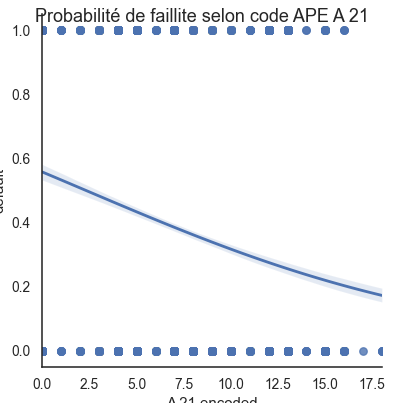

In [53]:
sns.lmplot(data=eda, x="A 21 encoded", y ='default', logistic=True).fig.suptitle('Probabilité de faillite selon code APE A 21')
plt.show()

In [54]:
# building the model and fitting the data
import statsmodels.api as sm
import statsmodels.formula.api as smf

eda_temp = eda.copy()
eda_temp = eda_temp.rename(columns={'A 21 encoded':'A21'})

f = 'default ~ A21'
logitfit = smf.logit(formula = str(f), data = eda_temp).fit()

# Inspecte les résultats 
logitfit.summary()

Optimization terminated successfully.
         Current function value: 0.647434
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 6188
Model:                          Logit   Df Residuals:                     6186
Method:                           MLE   Df Model:                            1
Date:                Tue, 03 May 2022   Pseudo R-squ.:                 0.02971
Time:                        08:46:09   Log-Likelihood:                -4006.3
converged:                       True   LL-Null:                       -4129.0
Covariance Type:            nonrobust   LLR p-value:                 2.724e-55
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2309      0.051      4.486      0.000       0.130       0.332
A21           -0.1000      0.007    -15.237      0.000      -0.113      -0.087
==============================================================================
"""

In [57]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression

In [65]:
# Modèle 1 : régression logistique juste sur l' A 21 encodé à la main en ordinal

model_1 = LogisticRegression()

X1_train = trainset[["A 21 encoded"]]
y1_train = trainset["default"]
X1_test = testset[["A 21 encoded"]]
y1_test = testset["default"]

In [68]:
# Modèle 2 : régression logistique juste sur l'A 21, mais cette fois encodé en one hot

model_2 = make_pipeline(OneHotEncoder(handle_unknown='ignore'), LogisticRegression())

X2_train = trainset[["A 21"]]
y2_train = trainset["default"]
X2_test = testset[["A 21"]]
y2_test = testset["default"]

__---__ CONFUSION MATRIX __---__
          Predicted 0  Predicted 1  TOTAL
Actual 0          685           71    756
Actual 1          407           75    482
TOTAL            1092          146   1238

__---__ CLASSIFICATION REPORT __---__
              precision    recall  f1-score   support

         0.0       0.63      0.91      0.74       756
         1.0       0.51      0.16      0.24       482

    accuracy                           0.61      1238
   macro avg       0.57      0.53      0.49      1238
weighted avg       0.58      0.61      0.55      1238



<IPython.core.display.Javascript object>


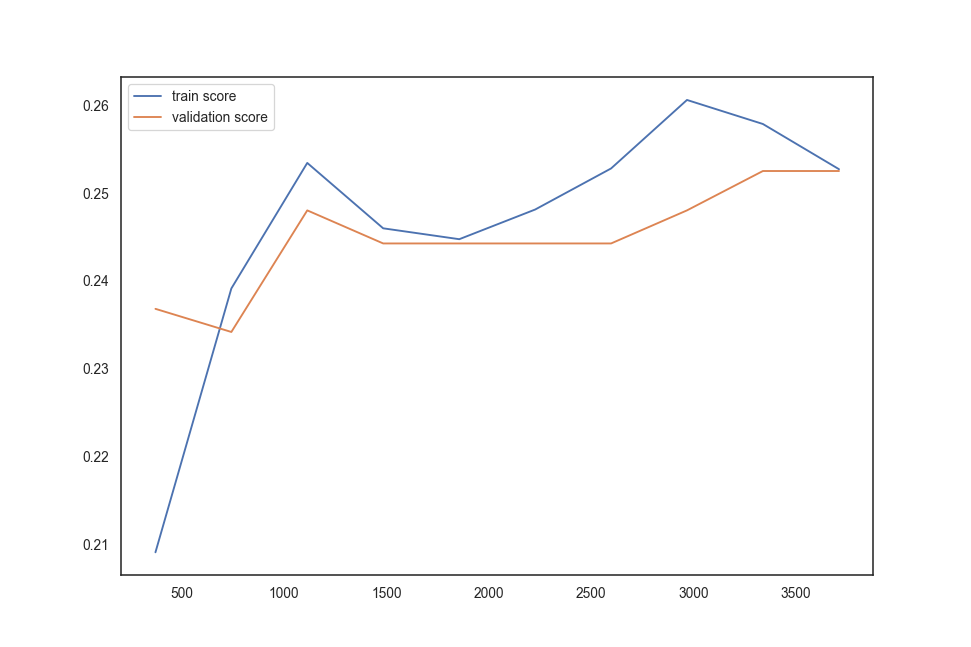

In [66]:
evaluate(model_1, X1_train, y1_train, X1_test, y1_test)

__---__ CONFUSION MATRIX __---__
          Predicted 0  Predicted 1  TOTAL
Actual 0          691           65    756
Actual 1          417           65    482
TOTAL            1108          130   1238

__---__ CLASSIFICATION REPORT __---__
              precision    recall  f1-score   support

         0.0       0.62      0.91      0.74       756
         1.0       0.50      0.13      0.21       482

    accuracy                           0.61      1238
   macro avg       0.56      0.52      0.48      1238
weighted avg       0.58      0.61      0.54      1238



<IPython.core.display.Javascript object>


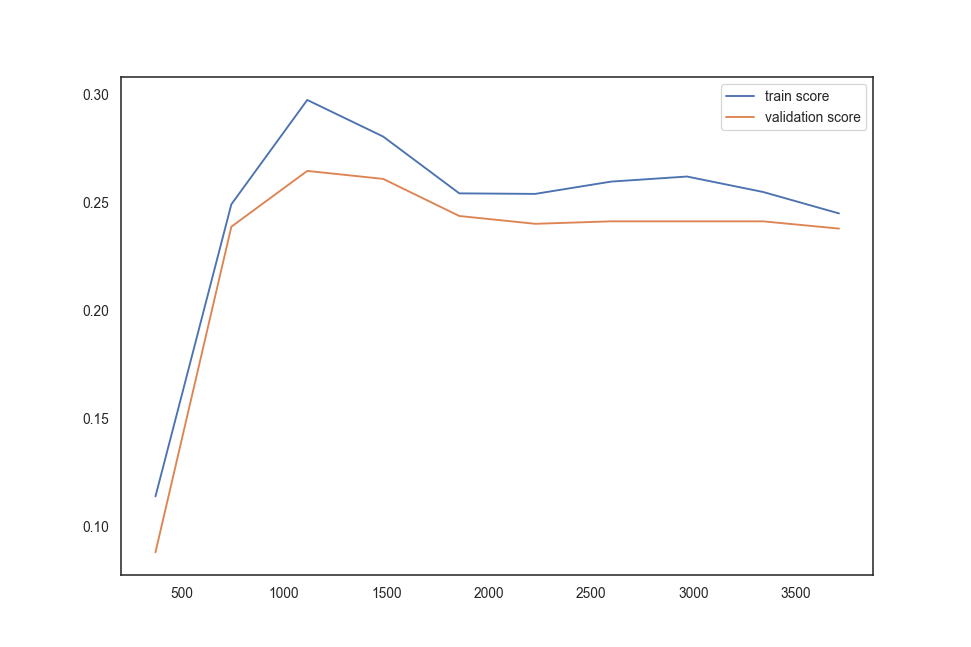

In [69]:
evaluate(model_2, X2_train, y2_train, X2_test, y2_test)

### Dettes fiscales et sociales et target
- Le graphe confirme bien que **le montant des dettes fiscales et sociales est distribué différemment selon que l'on est une entreprise saine ou défaillante.** 
- On voit que les outliers sont davantage du côté des entreprises défaillantes mais qu'il y en a quand même un certain nombre chez les saines. Peut-être intéressant de plutôt calculer le poids des dettes dans le CA. On observe effectivement que ca resserre les données des entreprises saines tout en étalant au contraire celles des entreprises défaillantes.
- Mais après cette opération le coeff de corrélation est divisé par 2 (de 0,12 à 0,6)
- A confirmer avec une régression logistique => je n'arrive pas à trancher entre les deux.

In [25]:
eda["Taux dettes fiscales sur CA"] = eda['Dettes fiscales et sociales (DY) 2018 (€)'] / eda["Chiffre d'affaires net (Total) (FL) 2018 (€)"]

In [26]:
import plotly.express as px
fig = px.histogram(eda, x=eda["Taux dettes fiscales sur CA"], color="default", nbins=6000, histnorm='probability density', marginal="box")
fig.update_traces(opacity=0.6)
fig.show()

In [73]:
eda["default"].corr(eda["Taux dettes fiscales sur CA"])

0.06275977630604976

In [74]:
eda["default"].corr(eda['Dettes fiscales et sociales (DY) 2018 (€)'])

0.12596989023176053

In [23]:
# AVEC PLOTLY (oui à conserver)
import plotly.express as px
fig = px.histogram(eda, x=eda['Dettes fiscales et sociales (DY) 2018 (€)'], color="default", nbins=6000, histnorm='probability density', marginal="box")
fig.update_traces(opacity=0.6)
fig.show()

<IPython.core.display.Javascript object>


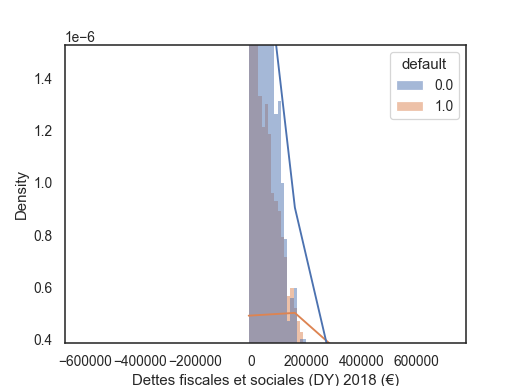

In [160]:
# AVEC SEABORN (pas forcément garder)
plt.figure()
sns.histplot(df, x=eda['Dettes fiscales et sociales (DY) 2018 (€)'], hue=eda['default'], stat="density", kde=True)
plt.show()

In [167]:
# Modèle 1 : régression logistique avec le taux
# Modèle 2 : régression logistique juste sur l'A 21, mais cette fois encodé en one hot

In [77]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression


model_3 = LogisticRegression()
model_4 = LogisticRegression()

In [79]:
#### Train test split => on en refait un car rajout de la colonne Taux de dettes fiscales dans le df eda

from sklearn.model_selection import train_test_split

# on peut dans un premier temps séparer en 2 le dataset :
trainset, testset = train_test_split(eda, test_size=0.2, random_state=0)

# on vérifie que la distribution de la target reste OK dans les test et train set => c'est OK
trainset['default'].value_counts(normalize=True)

testset['default'].value_counts(normalize=True)

0.00000   0.61066
1.00000   0.38934
Name: default, dtype: float64

In [80]:
# modèle 3 : régression logistique sur le taux

X3_train = trainset[["Taux dettes fiscales sur CA"]]
y3_train = trainset["default"]
X3_test = testset[["Taux dettes fiscales sur CA"]]
y3_test = testset["default"]

In [81]:
# modèle 4 : régression logistique sur la valeur

X4_train = trainset[['Dettes fiscales et sociales (DY) 2018 (€)']]
y4_train = trainset["default"]
X4_test = testset[['Dettes fiscales et sociales (DY) 2018 (€)']]
y4_test = testset["default"]

__---__ CONFUSION MATRIX __---__
          Predicted 0  Predicted 1  TOTAL
Actual 0          744           12    756
Actual 1          446           36    482
TOTAL            1190           48   1238

__---__ CLASSIFICATION REPORT __---__
              precision    recall  f1-score   support

         0.0       0.63      0.98      0.76       756
         1.0       0.75      0.07      0.14       482

    accuracy                           0.63      1238
   macro avg       0.69      0.53      0.45      1238
weighted avg       0.67      0.63      0.52      1238



<IPython.core.display.Javascript object>


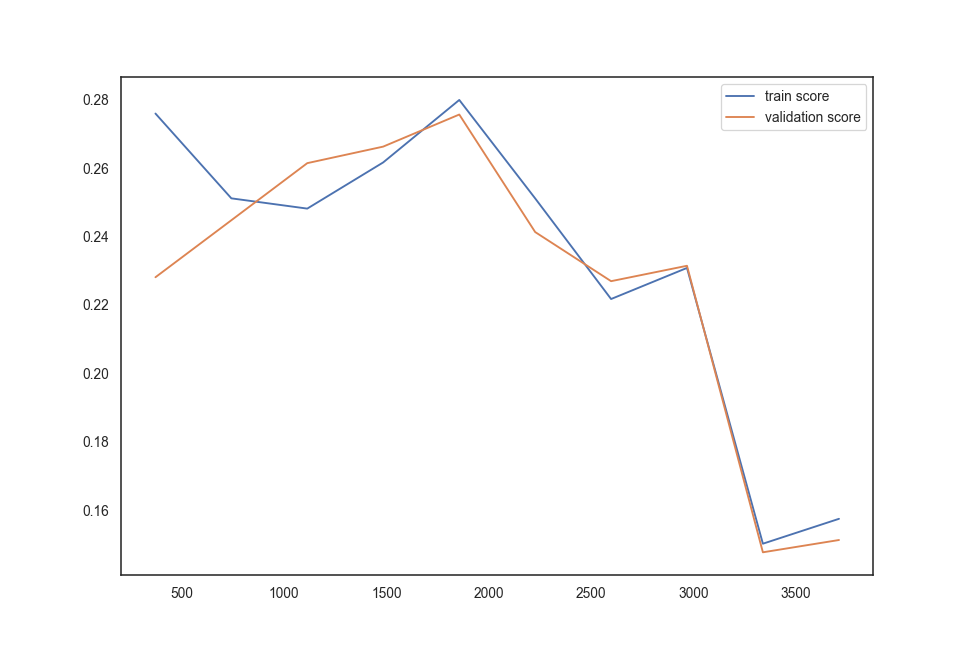

In [82]:
evaluate(model_3, X3_train, y3_train, X3_test, y3_test)

__---__ CONFUSION MATRIX __---__
          Predicted 0  Predicted 1  TOTAL
Actual 0          268          488    756
Actual 1          104          378    482
TOTAL             372          866   1238

__---__ CLASSIFICATION REPORT __---__
              precision    recall  f1-score   support

         0.0       0.72      0.35      0.48       756
         1.0       0.44      0.78      0.56       482

    accuracy                           0.52      1238
   macro avg       0.58      0.57      0.52      1238
weighted avg       0.61      0.52      0.51      1238



<IPython.core.display.Javascript object>


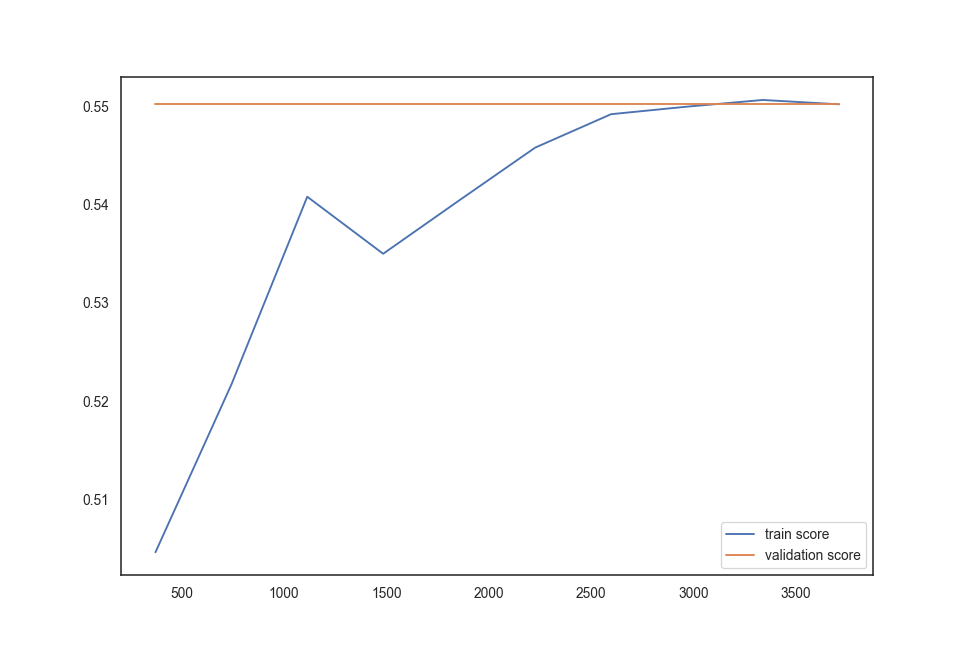

In [83]:
evaluate(model_4, X4_train, y4_train, X4_test, y4_test)

# Tentative de modélisation
## On prend la df après suppression des outliers et des colonnes certainement inutiles
On prend la df sans suppression des outliers (l'idée est que la plupart des outliers sont souvent des défaillantes, et que donc ils contiennent de l'information utile. Les donnée "outliers" ne sont pas des erreurs mais ont une logique économique. On choisit donc de les conserver.
On fait un premier tour. On sait qu'on a beaucoup trop de variables et qu'il va falloir sélectionner parmi elles.
On a déjà une première idée des variables les plus pertinentes
Mais on peut peut être valider ca avec des feature importance (random forest par exemple ?)

### Preprocessing
- Variables catégorielles :
Tranche effectif => encodage ordinal, finalement supprimé
Code A 21 => encodage ordinal
Catégorie juridique => prévoir encodage one hot (11 modalités)
Toutes les autres variables catégorielles => à supprimer

- Imputation des nan :


In [430]:
baseline = df.copy()

In [431]:
baseline.shape

(6188, 117)

In [436]:
# On décide de ce qu'on va faire des nan
(baseline.isna().sum()/baseline.shape[0]).sort_values(ascending=False)

Capacite de remboursement                                                                              0.02909
Liquidite generale                                                                                     0.00485
Liquidite reduite                                                                                      0.00485
Credit Fournisseurs                                                                                    0.00178
Poids interets                                                                                         0.00162
Rentabilite des capitaux propres                                                                       0.00032
Rentabilite financiere                                                                                 0.00032
Taux endettement                                                                                       0.00016
T.V.A. - Montant brut (VW) 2018 (€)                                                                    0.00000
I

In [435]:
# On décide de ce qu'on va faire des nan
np.isinf(baseline.select_dtypes(np.number)).values.sum()
#(baseline.isinf().sum()/baseline.shape[0]).sort_values(ascending=False)

0

In [432]:
# passage des catégories en variables catégorielles
baseline = baseline.astype({"A 21 encoded" : 'category', 
                            "Catégorie juridique (Niveau II)" : 'category', 
                            'A 21' : 'category'})

In [433]:
# drop A21 encoded
baseline = baseline.drop(["A 21 encoded"], axis=1)

In [434]:
# passage des infinis en nan
baseline = baseline.replace([np.inf, -np.inf], np.nan)

In [437]:
#### Train test split

from sklearn.model_selection import train_test_split

# on peut dans un premier temps séparer en 2 le dataset :
trainset, testset = train_test_split(baseline, test_size=0.2, random_state=0)

# on vérifie que la distribution de la target reste OK dans les test et train set => c'est OK
trainset['default'].value_counts(normalize=True)

testset['default'].value_counts(normalize=True)


0.00000   0.61066
1.00000   0.38934
Name: default, dtype: float64

In [21]:
from sklearn.preprocessing import RobustScaler, OneHotEncoder, OrdinalEncoder

from sklearn.impute import SimpleImputer, KNNImputer

from sklearn.pipeline import make_pipeline

from sklearn.compose import ColumnTransformer

# pour afficher les pipelines
from sklearn import set_config
set_config(display='diagram')

In [22]:
num_cols = df.select_dtypes(np.number).columns.drop("default")
categ_cols = ["Catégorie juridique (Niveau II)"]
ordinal_cols = ['A 21']
ordinal_encoding = [['C','E','P','H','F','I','R','G','N','J','S','Q','M','K','A','L','D','O','B']]

In [23]:
numerical_pipeline = make_pipeline(SimpleImputer(strategy='constant', fill_value=0), RobustScaler())
categorical_pipeline = make_pipeline(OneHotEncoder(handle_unknown='ignore'))
ordinal_pipeline = make_pipeline(OrdinalEncoder(categories = ordinal_encoding, handle_unknown = "use_encoded_value", unknown_value=-999))

In [24]:
preprocessing = ColumnTransformer([("pipe_cat", categorical_pipeline, categ_cols),
                                   ("pipe_ordinal", ordinal_pipeline, ordinal_cols),
                                   ("pipe_num", numerical_pipeline, num_cols)],
                                  remainder="drop")

### Modèles

#### Modèles 5 et 9 : régression logistique, avec différentes options
La régression logistique est conseillée pour commencer car c'est le plus simple.
Néanmoins on a beaucoup de variables :
- trop grande complexité => on n'arrive pas à converger, même en augmentant le max_iter, en jouant sur les solvers, et en jouant sur le nombre de paramètres via la régularisation
- trop de features : on sait qu'on a de la multicolinéarité, il faut régulariser. Même en jouant dessus, ça n'est pas top et surtout ça ne converge pas.

-**MODELE 5**:
    - Utilisation des hyperparamètres classiques, seulement augmentation de max_iter=1000
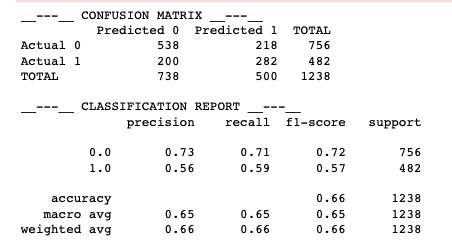
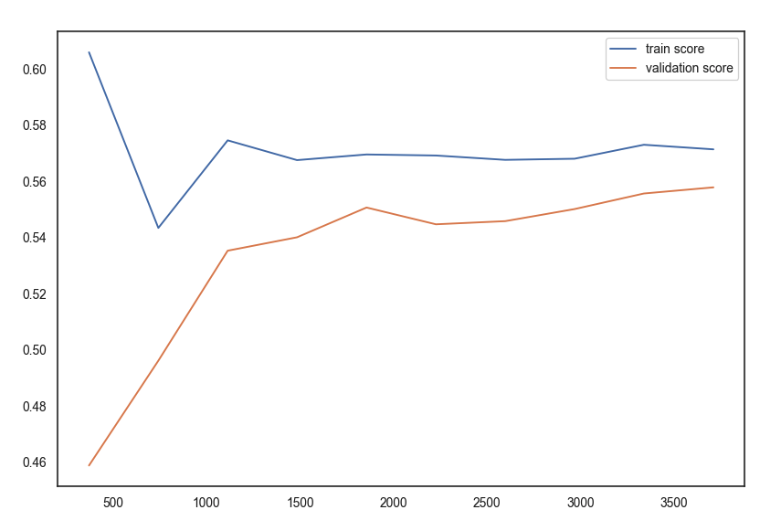

-**MODELE 9**:
    - Utilisation d'un autre solver qui permet d'utiliser l1 (liblinear), et réduction de C à 0,5 ce qui accroit la pénalité et donc la régularisation
    - Ca semble être la bonne voie : les performances sont nettement améliorée, l'overfitting reste OK :
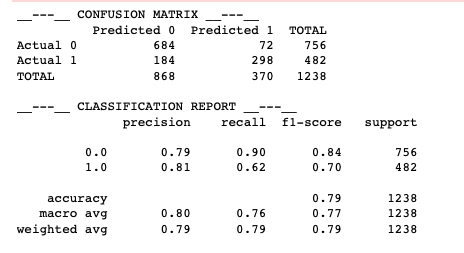
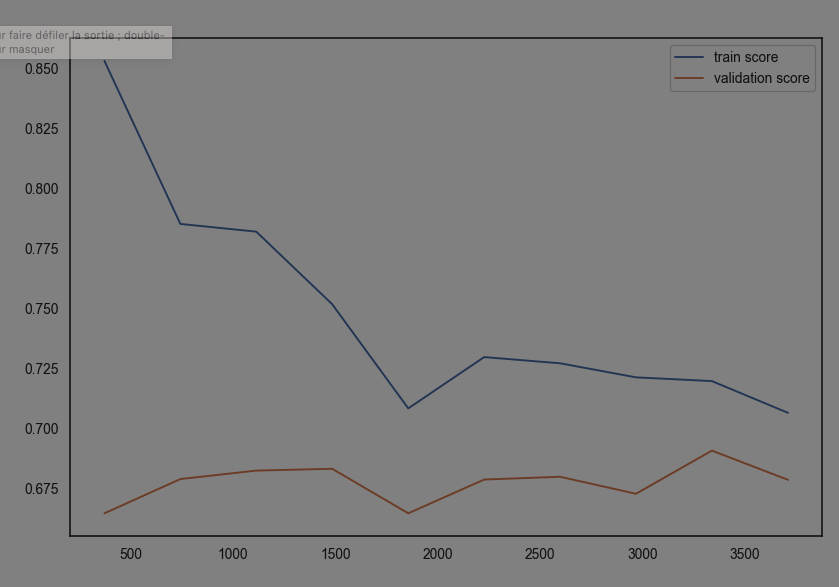
    - Mais on a toujours le problème de convergence.

In [25]:
# Modèle 5 : régression logistique sur toutes les variables
from sklearn.linear_model import LogisticRegression

model_5 = make_pipeline(preprocessing, LogisticRegression(max_iter=1000))
model_9 = make_pipeline(preprocessing, LogisticRegression(max_iter=1000, solver='liblinear', penalty='l1', C=0.5))

X5_train = trainset.drop(["default"], axis=1)
y5_train = trainset["default"]
X5_test = testset.drop(["default"], axis=1)
y5_test = testset["default"]

In [ ]:
evaluate(model_9, X5_train, y5_train, X5_test, y5_test)

In [32]:
model_9_ter = make_pipeline(preprocessing, LogisticRegression(max_iter=10000, solver='liblinear', penalty='l1', C=0.5))

__---__ CONFUSION MATRIX __---__
          Predicted 0  Predicted 1  TOTAL
Actual 0          639           71    710
Actual 1          179          259    438
TOTAL             818          330   1148

__---__ CLASSIFICATION REPORT __---__
              precision    recall  f1-score   support

         0.0       0.78      0.90      0.84       710
         1.0       0.78      0.59      0.67       438

    accuracy                           0.78      1148
   macro avg       0.78      0.75      0.76      1148
weighted avg       0.78      0.78      0.77      1148



/Users/marie/.pyenv/versions/3.9.5/envs/simplon/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/marie/.pyenv/versions/3.9.5/envs/simplon/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/marie/.pyenv/versions/3.9.5/envs/simplon/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/marie/.pyenv/versions/3.9.5/envs/simplon/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/marie/.pyenv/

<IPython.core.display.Javascript object>


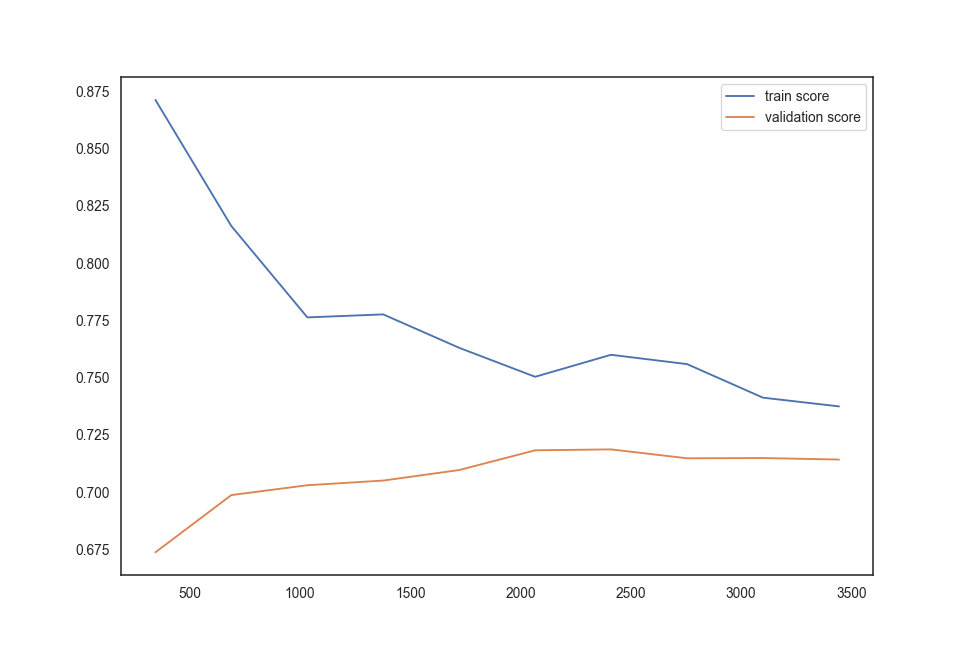

In [30]:
evaluate(model_9, X_train, y_train, X_test, y_test)

In [ ]:
# logistic regression mais avec un solver différent pour tenter de résoudre le problème de max iter
# ne le résout pas mais améliore les performances
#evaluate(model_9_ter, X_train, y_train, X_test, y_test)

__---__ CONFUSION MATRIX __---__
          Predicted 0  Predicted 1  TOTAL
Actual 0          639           71    710
Actual 1          179          259    438
TOTAL             818          330   1148

__---__ CLASSIFICATION REPORT __---__
              precision    recall  f1-score   support

         0.0       0.78      0.90      0.84       710
         1.0       0.78      0.59      0.67       438

    accuracy                           0.78      1148
   macro avg       0.78      0.75      0.76      1148
weighted avg       0.78      0.78      0.77      1148



/Users/marie/.pyenv/versions/3.9.5/envs/simplon/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/marie/.pyenv/versions/3.9.5/envs/simplon/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/marie/.pyenv/versions/3.9.5/envs/simplon/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/marie/.pyenv/versions/3.9.5/envs/simplon/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


#### Modèle 6 - Random Forest avec toutes les variables + feature importance

**Modele_6 : Random Forest sur tout le dataset**
Comme on s'y attendait, on est dans le cadre d'un overfitting très important.
Mais on a quand même des résultats intéressants avec un f1 score de 0,76 !!
Il faut donc continuer dans cette voie, en cherchant à réduire le nombre de features pour diminuer l'overfitting.
Ou peut être à combiner avec d'autres modèles pour réduire cette problématique (revoir la vidéo sur bagging boosting)

**A FAIRE**
- Pour diminuer le nombre de features à l'aide de la feature importance et de l'analyse manuelle des données :
    - Tester de regrouper ensemble les variables les plus importantes, en faisant des combinaisons linéaires de celles qui sont comparables et qui vont dans le même sens (par exemple additionner les ratios positifs d'un côté, puis additionner les variables de résultats, puis....)
    - Regarder sinon du côté du VIF (Variance Importance Factor) ou de la PCA.

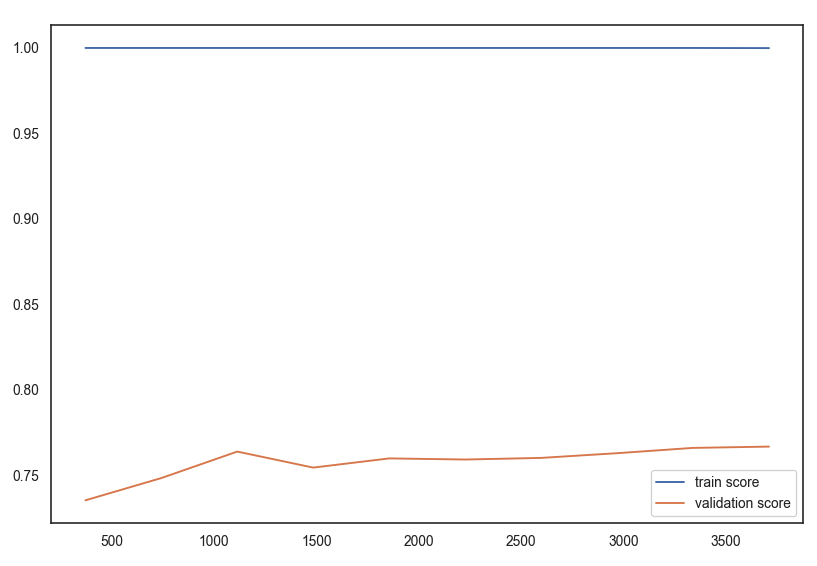
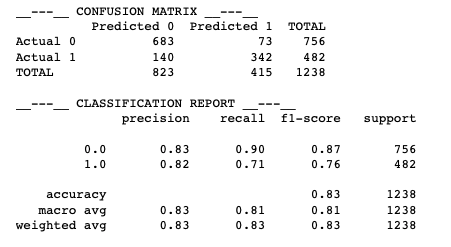


- Première étape : regardons la **feature importance.** Les plus importants sont 2 ratios financiers, puis 2 grands montants (bénéfice ou perte / total 1 DL - voir ce que c'est)
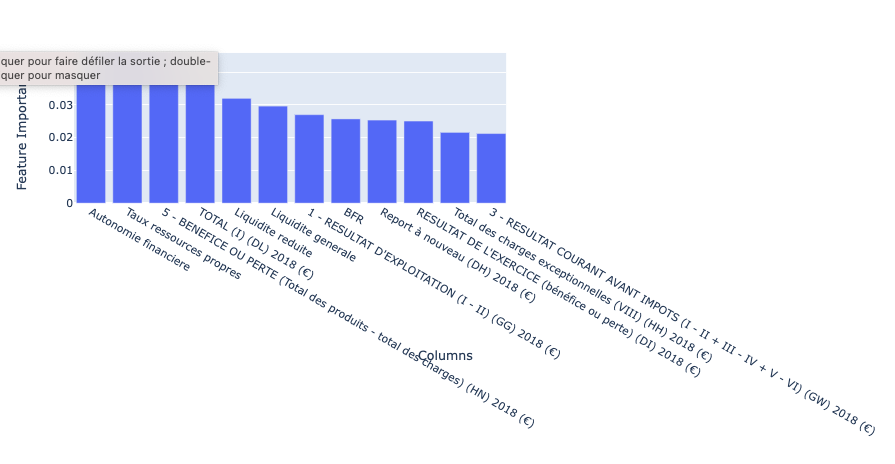



##### Evaluation du modèle

In [510]:
# Modèle 6 : random forest avec toutes les variables
from sklearn.ensemble import RandomForestClassifier

model_6 = make_pipeline(preprocessing, RandomForestClassifier(random_state=0))

X6_train = trainset.drop(["default"], axis=1)
y6_train = trainset["default"]
X6_test = testset.drop(["default"], axis=1)
y6_test = testset["default"]

__---__ CONFUSION MATRIX __---__
          Predicted 0  Predicted 1  TOTAL
Actual 0          683           73    756
Actual 1          140          342    482
TOTAL             823          415   1238

__---__ CLASSIFICATION REPORT __---__
              precision    recall  f1-score   support

         0.0       0.83      0.90      0.87       756
         1.0       0.82      0.71      0.76       482

    accuracy                           0.83      1238
   macro avg       0.83      0.81      0.81      1238
weighted avg       0.83      0.83      0.83      1238



<IPython.core.display.Javascript object>


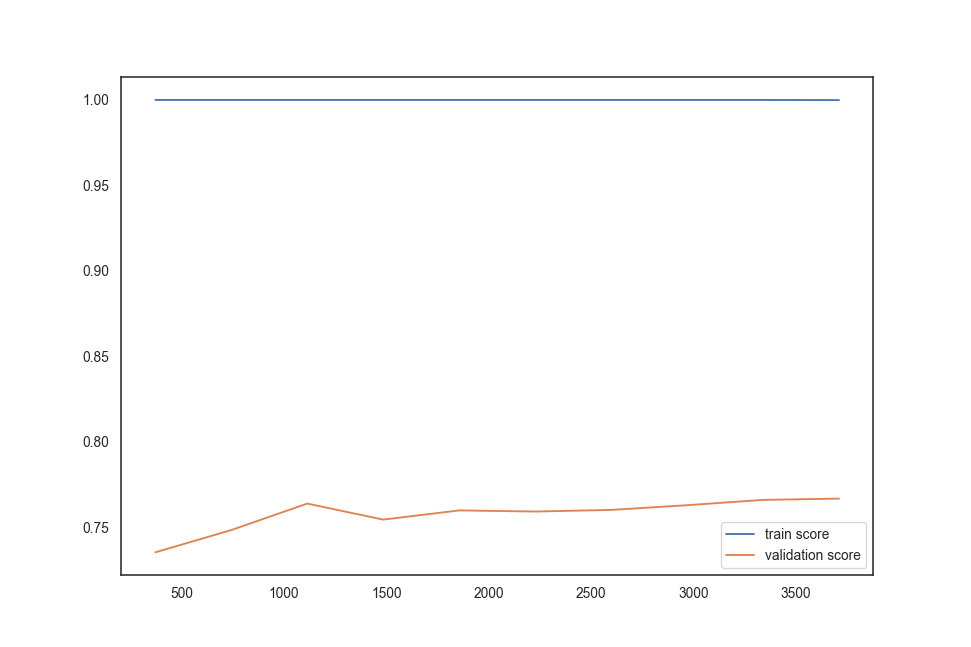

In [455]:
evaluate(model_6, X6_train, y6_train, X6_test, y6_test)

##### Feature Importance

In [461]:
model_6.fit(X6_train, y6_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipe_cat',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Catégorie juridique '
                                                   '(Niveau II)']),
                                                 ('pipe_ordinal',
                                                  Pipeline(steps=[('ordinalencoder',
                                                                   OrdinalEncoder(categories=[['C',
                                                                                               'E',
                                                                                               'P',
                                                                                               'H',
                                                                                               'F',
                                                                                               'I',
                                                                                               'R',
                                                                                               'G',
                                                                                               'N',
                                                                                               'J',
                                                                                               'S',
                                                                                               'Q',
                                                                                               'M',
                                                                                               'K',
                                                                                               'A',
                                                                                               'L',
                                                                                               'D',
                                                                                               'O',
                                                                                               'B']],
                                                                                  ha...
                                                  Index(['Capital souscrit non appelé (I) (AA) 2018 (€)', 'TOTAL (II) (net) (BJNET) 2018 (€)', 'Matières premières, approvisionnements (net) (BLNET) 2018 (€)', 'En cours de production de biens (net) (BNNET) 2018 (€)', 'En cours de production de services (net) (BPNET) 2018 (€)', 'Produits intermédiaires et finis (net) (BRNET) 2018 (€)', 'Marchandises (net) (BTNET) 2018 (€)', 'Avances et acomptes versés sur commandes (net) (BVNET) 2018 (€)', 'Clients et comptes rattachés (3) (net) (BXNET) 2018 (€)', 'Autres créances (3) (net) (BZNET) 2018 (€)',
       ...
       'Rentabilite des capitaux propres', 'Autonomie financiere', 'Poids interets', 'Taux EBE', 'Taux VA', 'Taux Rentabilite', 'Poids dettes fiscales', 'Tresorerie', 'Taux augmentation endettement CT', 'Age entreprise'], dtype='object', length=112))])),
                ('randomforestclassifier', RandomForestClassifier())])

In [484]:
# Récupérer les noms des colonnes One Hot !!!
onehot_columns = list(model_6.named_steps['columntransformer'].named_transformers_['pipe_cat'].named_steps['onehotencoder'].get_feature_names(input_features=categ_cols))

In [485]:
onehot_columns

['Catégorie juridique (Niveau II)_Autre personne morale de droit privé',
 'Catégorie juridique (Niveau II)_Entrepreneur individuel',
 'Catégorie juridique (Niveau II)_Personne morale de droit étranger, immatriculée au RCS (registre du commerce et des sociétés)',
 "Catégorie juridique (Niveau II)_Société anonyme à conseil d'administration",
 'Catégorie juridique (Niveau II)_Société anonyme à directoire',
 'Catégorie juridique (Niveau II)_Société civile',
 'Catégorie juridique (Niveau II)_Société coopérative agricole',
 'Catégorie juridique (Niveau II)_Société en commandite',
 'Catégorie juridique (Niveau II)_Société en nom collectif',
 'Catégorie juridique (Niveau II)_Société par actions simplifiée',
 'Catégorie juridique (Niveau II)_Société à responsabilité limitée (SARL)']

In [487]:
total_cols = list(onehot_columns) + list(ordinal_cols) + list(num_cols)
total_cols

['Catégorie juridique (Niveau II)_Autre personne morale de droit privé',
 'Catégorie juridique (Niveau II)_Entrepreneur individuel',
 'Catégorie juridique (Niveau II)_Personne morale de droit étranger, immatriculée au RCS (registre du commerce et des sociétés)',
 "Catégorie juridique (Niveau II)_Société anonyme à conseil d'administration",
 'Catégorie juridique (Niveau II)_Société anonyme à directoire',
 'Catégorie juridique (Niveau II)_Société civile',
 'Catégorie juridique (Niveau II)_Société coopérative agricole',
 'Catégorie juridique (Niveau II)_Société en commandite',
 'Catégorie juridique (Niveau II)_Société en nom collectif',
 'Catégorie juridique (Niveau II)_Société par actions simplifiée',
 'Catégorie juridique (Niveau II)_Société à responsabilité limitée (SARL)',
 'A 21',
 'Capital souscrit non appelé (I) (AA) 2018 (€)',
 'TOTAL (II) (net) (BJNET) 2018 (€)',
 'Matières premières, approvisionnements (net) (BLNET) 2018 (€)',
 'En cours de production de biens (net) (BNNET) 2018

In [480]:
model_6.named_steps

{'columntransformer': ColumnTransformer(transformers=[('pipe_cat',
                                  Pipeline(steps=[('onehotencoder',
                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                  ['Catégorie juridique (Niveau II)']),
                                 ('pipe_ordinal',
                                  Pipeline(steps=[('ordinalencoder',
                                                   OrdinalEncoder(categories=[['C',
                                                                               'E',
                                                                               'P',
                                                                               'H',
                                                                               'F',
                                                                               'I',
                                                                            

In [488]:
d = {"Columns": total_cols, "Feature Importance":model_6[1].feature_importances_}
fi = pd.DataFrame(d)

In [514]:
fi = fi.sort_values(by="Feature Importance", ascending = False)

In [515]:
import plotly.express as px
fig = px.bar(fi, x="Columns", y="Feature Importance")
fig.show()

# A faire pour améliorer le modèle et le travail - PCA
Jonathan le 27/05/2022 :
- Concernant la colinéarité des variables, faire une matrice de corrélation 2 à 2 pour voir le taux de corrélation entre les variables 
- EN FAIT le travail d'EDA sur les variables ne sert pas vraiment à sélectionner des variables mais plutôt à :
    - Identifier les transformations à opérer sur les variables :
            - Outliers, nulls
            - MAIS SURTOUT => transformations à leur appliquer pour favoriser l'apparition d'une relation linéaire (toujours meilleure à modéliser ensuite) avec la target : ça peut être passer en logs, ou en racine carrée, ou en polynomial...
- Mais surtout : Utiliser la PCA pour 2 raisons :
    - 1 => réduire le nombre de variables et résoudre le problème de colinéarité
    - 2 => utiliser derrière un clustering pour essayer de mettre en évidence les 2 groupes (idéalement) 
    
- Marche à suivre :
    - 1) Faire passer la PCA sur mes variables. Ca va me créer un paquet de nouvelles colonnes. Enregistrer tous ces nouveaux features dans un dataframe
    - 2) Virer les combinaisons qui ne me servent pas (en-dessous d'un certain seuil de variance expliquée)
    - 3) Faire un KNN avec 2 clusters pour voir si j'y retrouver mes 2 classes
    
## Préprocessing Numérique. 
Objectifs ==> imputer les valeurs manquantes et centrer les données autour de 0

In [22]:
# Définition de la target et des features, sélection seulement des variables numériques
X_pca = df.select_dtypes(include=np.number).drop(["default"], axis=1)
y_pca = df["default"]
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y_pca, test_size=0.33, random_state=42)

In [23]:
# StandardScaler sur le train:
from sklearn.preprocessing import StandardScaler


num_scaler = StandardScaler()
X_train_pca_scaled = num_scaler.fit_transform(X_train_pca)
X_train_pca_scaled = pd.DataFrame(X_train_pca_scaled, columns = X_train_pca.columns)
X_train_pca_scaled.shape

(3845, 113)

In [24]:
X_train_pca_scaled.columns

Index(['Capital souscrit non appelé (I) (AA) 2018 (€)', 'TOTAL (II) (net) (BJNET) 2018 (€)', 'Matières premières, approvisionnements (net) (BLNET) 2018 (€)', 'En cours de production de biens (net) (BNNET) 2018 (€)', 'En cours de production de services (net) (BPNET) 2018 (€)', 'Produits intermédiaires et finis (net) (BRNET) 2018 (€)', 'Marchandises (net) (BTNET) 2018 (€)', 'Avances et acomptes versés sur commandes (net) (BVNET) 2018 (€)', 'Clients et comptes rattachés (3) (net) (BXNET) 2018 (€)', 'Autres créances (3) (net) (BZNET) 2018 (€)',
       ...
       'Autonomie financiere', 'Poids interets', 'Taux EBE', 'Taux VA', 'Taux Rentabilite', 'Poids dettes fiscales', 'Tresorerie', 'Taux augmentation endettement CT', 'Age entreprise', 'A 21 encoded'], dtype='object', length=113)

## Identification du nombre de dimensions permettant de contribuer à 95% de la variance des features
- Matrice de covariance des features : vecteurs propres correspondent aux composantes principales, valeurs propres correspondent au % de variance du modèle contenu dans la composante principale.
- **pca.explained_variance_ratio_** renvoie un array de ces valeurs propres. On peut en faire la somme cumulative pour voir l'évolution de la proportion de variance totale expliquée par le modèle au fur et à mesure de l'ajout des dimensions.
- on peut ploter cette somme cumulative de la pca_explained_variance_ratio pour identifier le nombre oprimal de dimensions (au moment où on a une cassure sur la courbe)

In [25]:
from sklearn.decomposition import PCA
pca = PCA() # on instancie sans fixer le n_components
pca.fit(X_train_pca_scaled)
# % de variance du modèle contenu dans chaque composante principale
pca.explained_variance_ratio_

array([1.76119848e-01, 6.80820168e-02, 4.54309688e-02, 2.90601337e-02,
       2.54231127e-02, 2.21772196e-02, 2.14880601e-02, 1.99588016e-02,
       1.78236442e-02, 1.76644930e-02, 1.74316012e-02, 1.71049412e-02,
       1.62260237e-02, 1.50868055e-02, 1.43517307e-02, 1.37687664e-02,
       1.31375163e-02, 1.24784329e-02, 1.20343295e-02, 1.19136807e-02,
       1.18982663e-02, 1.12308610e-02, 1.10547232e-02, 1.06164431e-02,
       1.05230861e-02, 1.03286222e-02, 1.00280161e-02, 9.79291557e-03,
       9.76364410e-03, 9.44420134e-03, 9.32450937e-03, 9.20056739e-03,
       9.07014881e-03, 8.93457654e-03, 8.91124040e-03, 8.81275531e-03,
       8.69759125e-03, 8.67339498e-03, 8.54340746e-03, 8.40714806e-03,
       8.22573891e-03, 8.08702130e-03, 8.02934690e-03, 7.75555469e-03,
       7.63301308e-03, 7.55179244e-03, 7.46842572e-03, 7.30852964e-03,
       7.27696055e-03, 6.99115616e-03, 6.86845293e-03, 6.79462954e-03,
       6.60531138e-03, 6.45284559e-03, 6.36149690e-03, 6.20342263e-03,
      

In [43]:
pca.explained_variance_ratio_.plot()

AttributeError: 'numpy.ndarray' object has no attribute 'plot'

In [26]:
pca.explained_variance_ratio_.shape

(113,)

In [27]:
print("la première composante principale explique:", int(round(pca.explained_variance_ratio_[0],2)*100),"% de la variance")
print("la seconde composante principale explique:", int(round(pca.explained_variance_ratio_[1],2)*100),"% de la variance")
print("la troisième composante principale explique:", int(round(pca.explained_variance_ratio_[2],2)*100),"% de la variance")

la première composante principale explique: 18 % de la variance
la seconde composante principale explique: 7 % de la variance
la troisième composante principale explique: 5 % de la variance


In [28]:
# On fait la somme cumulée de la variance expliquée
cumsum = np.cumsum(pca.explained_variance_ratio_)
cumsum

array([0.17611985, 0.24420186, 0.28963283, 0.31869297, 0.34411608,
       0.3662933 , 0.38778136, 0.40774016, 0.42556381, 0.4432283 ,
       0.4606599 , 0.47776484, 0.49399086, 0.50907767, 0.5234294 ,
       0.53719817, 0.55033568, 0.56281412, 0.57484845, 0.58676213,
       0.59866039, 0.60989125, 0.62094598, 0.63156242, 0.64208551,
       0.65241413, 0.66244214, 0.67223506, 0.6819987 , 0.69144291,
       0.70076742, 0.70996798, 0.71903813, 0.72797271, 0.73688395,
       0.7456967 , 0.75439429, 0.76306769, 0.7716111 , 0.78001825,
       0.78824398, 0.79633101, 0.80436035, 0.81211591, 0.81974892,
       0.82730071, 0.83476914, 0.84207767, 0.84935463, 0.85634578,
       0.86321424, 0.87000887, 0.87661418, 0.88306702, 0.88942852,
       0.89563194, 0.90172178, 0.90776734, 0.91342675, 0.91900043,
       0.92438775, 0.92932241, 0.93408349, 0.93882905, 0.94343497,
       0.94773667, 0.95184005, 0.95585456, 0.95968152, 0.96333902,
       0.96688035, 0.97021689, 0.97335623, 0.97629585, 0.97896

In [29]:
d = np.argmax(cumsum >= 0.95) + 1
d # nombre de dimensions pour lesquelles la variance est au total de plus de 95%

67

**Résultats** 
- On peut réduire de 40% le nombre de features tout en conservant 95% de la variance (on passe de 113 à 67)
- Si on accepte d'avoir 80% de la variance, on passe à 43 features

<IPython.core.display.Javascript object>


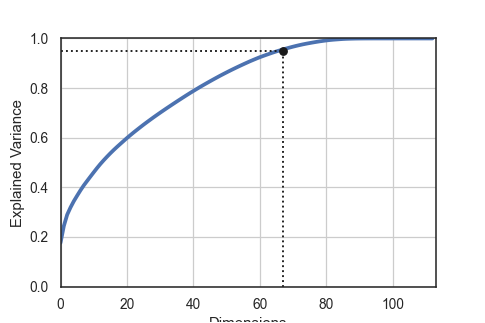

In [44]:
# représentation graphique de CUMSUM :
# code du livre d'A Géron
plt.figure(figsize=(6,4))
plt.plot(cumsum, linewidth=3)
plt.axis([0, X_train_pca_scaled.shape[1], 0, 1])
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.plot([d, d], [0, 0.95], "k:")
plt.plot([0, d], [0.95, 0.95], "k:")
plt.plot(d, 0.95, "ko")
#plt.annotate("Elbow", xy=(65, 0.85), xytext=(70, 0.7),
             #arrowprops=dict(arrowstyle="->"), fontsize=16)
plt.grid(True)
plt.show()

## Projection de X sur 67 dimensions => nouveau DF
C'est sur ce dataframe qu'il va falloir tester un KNN

In [31]:
# application 
pca = PCA(n_components = d)
X_train_reduced = pca.fit_transform(X_train_pca_scaled)
X_train_reduced.shape

(3845, 67)

In [32]:
# Transformation du X_test (scaler et PCA)
X_test_pca_scaled = num_scaler.transform(X_test_pca)
X_test_reduced = pca.transform(X_test_pca_scaled)

In [33]:
X_test_reduced.shape

(1895, 67)

## Représentation graphique de X sur les deux premiers axes
On colore selon le y_train qui est de 0 ou de 1

In [46]:
import plotly.express as px
from sklearn.decomposition import PCA


X = X_train_pca_scaled

pca = PCA(n_components=d)
components = pca.fit_transform(X)

fig = px.scatter(components, x=1, y=2, color=y_train_pca, 
                 labels = {
    "0":"Principal Component n°1",
    "1":"Principal Component n°2"
                        },
                title="Projection de X sur les deux premiers axes des Composantes Principales") 
fig.show()


In [57]:
import plotly.express as px
from sklearn.decomposition import PCA


X = X_train_pca_scaled

pca = PCA(n_components=d)
components = pca.fit_transform(X)

fig = px.scatter_3d(components, x=0, y=1, z=2, color=y_train_pca, 
                 labels = {
    "0":"Principal Component n°1",
    "1":"Principal Component n°2",
    "2":"Principal Component n°3"
                        },
                title="Projection de X sur les deux premiers axes des Composantes Principales") 
fig.show()

## Clustering sur la PCA

In [34]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=2)
neigh.fit(X_train_reduced, y_train_pca)

KNeighborsClassifier(n_neighbors=2)

In [35]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0).fit(X_train_reduced)

In [36]:
y_pred = kmeans.predict(X_train_reduced)

In [37]:
y_train_pca.sum()

1485.0

In [45]:
y_pred.shape

(3845,)

In [39]:
y_pred.sum()

229

In [90]:
for i in range(y_train.shape[0]):
    print(y_pred[i], '-------', np.array(y_train_pca, dtype='int32')[i])
    #print(np.array(y_train, dtype='int32')[i])

0 ------- 0
0 ------- 0
0 ------- 0
0 ------- 1
0 ------- 1
0 ------- 0
0 ------- 1
0 ------- 0
0 ------- 1
0 ------- 0
0 ------- 0
0 ------- 0
0 ------- 1
0 ------- 0
0 ------- 0
0 ------- 1
0 ------- 1
0 ------- 0
0 ------- 0
0 ------- 0
0 ------- 1
0 ------- 1
1 ------- 0
0 ------- 0
0 ------- 0
0 ------- 1
0 ------- 0
0 ------- 1
0 ------- 0
0 ------- 1
0 ------- 0
0 ------- 0
0 ------- 0
0 ------- 0
0 ------- 0
0 ------- 0
0 ------- 1
0 ------- 0
0 ------- 1
0 ------- 0
0 ------- 1
0 ------- 1
0 ------- 1
0 ------- 0
0 ------- 0
0 ------- 0
0 ------- 0
1 ------- 1
0 ------- 1
0 ------- 1
0 ------- 1
0 ------- 0
0 ------- 0
0 ------- 0
0 ------- 1
0 ------- 1
0 ------- 0
0 ------- 0
0 ------- 0
0 ------- 1
0 ------- 0
0 ------- 0
0 ------- 0
0 ------- 1
0 ------- 0
0 ------- 0
0 ------- 0
0 ------- 0
0 ------- 0
0 ------- 1
0 ------- 0
0 ------- 1
0 ------- 1
0 ------- 0
0 ------- 0
0 ------- 0
0 ------- 1
0 ------- 1
0 ------- 0
0 ------- 0
0 ------- 1
1 ------- 0
0 ------- 1
0 --

0 ------- 0
0 ------- 0
0 ------- 0
0 ------- 0
0 ------- 1
0 ------- 0
0 ------- 1
0 ------- 1
0 ------- 0
0 ------- 0
0 ------- 0
0 ------- 0
0 ------- 0
0 ------- 0
0 ------- 0
0 ------- 0
0 ------- 0
0 ------- 1
0 ------- 0
0 ------- 1
0 ------- 0
0 ------- 0
0 ------- 0
0 ------- 1
0 ------- 0
0 ------- 1
0 ------- 0
0 ------- 0
0 ------- 1
0 ------- 0
0 ------- 0
0 ------- 0
0 ------- 0
1 ------- 1
0 ------- 1
0 ------- 0
0 ------- 1
0 ------- 0
0 ------- 1
0 ------- 0
0 ------- 0
0 ------- 0
0 ------- 0
0 ------- 1
0 ------- 0
0 ------- 0
0 ------- 1
0 ------- 0
0 ------- 1
0 ------- 1
0 ------- 0
0 ------- 1
1 ------- 1
1 ------- 0
0 ------- 0
0 ------- 0
1 ------- 1
0 ------- 1
0 ------- 0
0 ------- 1
0 ------- 0
0 ------- 1
0 ------- 1
0 ------- 0
0 ------- 1
0 ------- 0
0 ------- 0
0 ------- 1
0 ------- 0
0 ------- 0
0 ------- 1
0 ------- 1
0 ------- 0
1 ------- 1
0 ------- 0
0 ------- 0
0 ------- 1
0 ------- 1
0 ------- 0
0 ------- 0
0 ------- 1
0 ------- 1
0 ------- 0
1 --

0 ------- 0
0 ------- 0
0 ------- 0
0 ------- 1
0 ------- 0
0 ------- 0
0 ------- 0
0 ------- 0
0 ------- 1
0 ------- 0
0 ------- 0
0 ------- 1
0 ------- 0
0 ------- 1
0 ------- 1
0 ------- 0
0 ------- 0
0 ------- 1
0 ------- 0
0 ------- 0
0 ------- 1
0 ------- 0
0 ------- 0
0 ------- 1
0 ------- 0
0 ------- 0
0 ------- 1
0 ------- 0
0 ------- 0
0 ------- 1
0 ------- 0
0 ------- 1
0 ------- 0
0 ------- 0
0 ------- 0
0 ------- 0
0 ------- 1
0 ------- 0
0 ------- 0
0 ------- 0
0 ------- 0
0 ------- 1
0 ------- 1
0 ------- 0
0 ------- 0
0 ------- 0
0 ------- 0
0 ------- 1
0 ------- 1
0 ------- 0
1 ------- 1
0 ------- 1
0 ------- 0
0 ------- 0
0 ------- 0
0 ------- 0
0 ------- 0
0 ------- 0
0 ------- 1
0 ------- 0
0 ------- 0
0 ------- 0
0 ------- 0
0 ------- 0
0 ------- 0
0 ------- 1
0 ------- 0
1 ------- 1
0 ------- 1
0 ------- 0
0 ------- 0
0 ------- 1
0 ------- 1
0 ------- 1
1 ------- 0
0 ------- 1
0 ------- 0
0 ------- 0
0 ------- 1
0 ------- 0
0 ------- 1
0 ------- 0
0 ------- 0
0 --

0 ------- 0
0 ------- 1
0 ------- 1
0 ------- 1
0 ------- 0
0 ------- 0
0 ------- 0
0 ------- 1
0 ------- 1
0 ------- 1
0 ------- 0
0 ------- 0
0 ------- 1
0 ------- 0
0 ------- 0
0 ------- 1
0 ------- 0
1 ------- 0
0 ------- 0
0 ------- 0
0 ------- 1
0 ------- 0
0 ------- 0
0 ------- 0
0 ------- 0
0 ------- 1
0 ------- 0
0 ------- 0
0 ------- 0
1 ------- 1
1 ------- 1
0 ------- 0
0 ------- 0
0 ------- 0
1 ------- 1
0 ------- 1
0 ------- 0
0 ------- 1
0 ------- 1
1 ------- 1
0 ------- 0
0 ------- 1
0 ------- 0
0 ------- 1
0 ------- 0
0 ------- 1
0 ------- 1
0 ------- 1
0 ------- 1
0 ------- 0
0 ------- 0
0 ------- 0
0 ------- 0
0 ------- 0
0 ------- 0
0 ------- 1
0 ------- 0
0 ------- 1
0 ------- 0
1 ------- 0
0 ------- 0
0 ------- 0
0 ------- 0
0 ------- 1
0 ------- 0
0 ------- 0
0 ------- 0
0 ------- 1
0 ------- 0
0 ------- 1
0 ------- 0
0 ------- 0
0 ------- 0
0 ------- 0
0 ------- 0
0 ------- 0
0 ------- 0
1 ------- 1
0 ------- 0
0 ------- 1
0 ------- 0
1 ------- 0
0 ------- 0
0 --

0 ------- 0
0 ------- 0
0 ------- 0
0 ------- 0
0 ------- 1
0 ------- 0
0 ------- 1
0 ------- 1
0 ------- 1
0 ------- 1
0 ------- 1
0 ------- 1
0 ------- 0
0 ------- 1
1 ------- 1
0 ------- 0
0 ------- 1
0 ------- 0
0 ------- 0
0 ------- 0
0 ------- 0
0 ------- 0
0 ------- 0
0 ------- 0
0 ------- 0
0 ------- 1
0 ------- 0
0 ------- 0
0 ------- 0
0 ------- 1
0 ------- 0
0 ------- 0
0 ------- 1
0 ------- 0
0 ------- 0
0 ------- 0
0 ------- 0
1 ------- 0
0 ------- 0
0 ------- 0
0 ------- 0
0 ------- 0
0 ------- 0
0 ------- 0
0 ------- 0
0 ------- 1
0 ------- 1
0 ------- 0
0 ------- 0
0 ------- 1
1 ------- 0
0 ------- 0
0 ------- 1
0 ------- 0
0 ------- 0
0 ------- 0
0 ------- 0
0 ------- 0
1 ------- 1
0 ------- 0
0 ------- 1
0 ------- 0
0 ------- 1
0 ------- 0
1 ------- 1
0 ------- 1
0 ------- 0
0 ------- 0
0 ------- 0
0 ------- 0
0 ------- 1
0 ------- 1
0 ------- 0
0 ------- 1
0 ------- 1
0 ------- 0
0 ------- 1
0 ------- 0
0 ------- 1
0 ------- 1
0 ------- 0
0 ------- 0
0 ------- 1
0 --

In [40]:
kmeans2 = KMeans(n_clusters=2, random_state=0, algorithm='elkan').fit(X_train_reduced)

In [41]:
y_pred2 = kmeans2.predict(X_train_reduced)

In [42]:
y_pred2.sum()

229

## Regression logistique sur PCA

In [55]:
from sklearn.linear_model import LogisticRegression
model_5_bis = LogisticRegression(max_iter=10000)
model_9_bis = LogisticRegression(max_iter=10000, solver='liblinear', penalty='l1', C=0.5)

**Régression logistique sur les 2 premières composantes principales**

- Régression logistique "toute bête" sans hyperparamètres
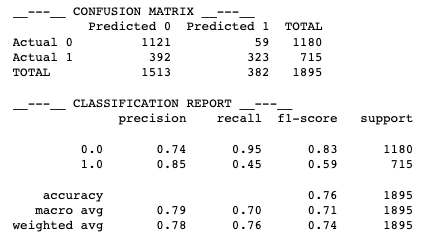

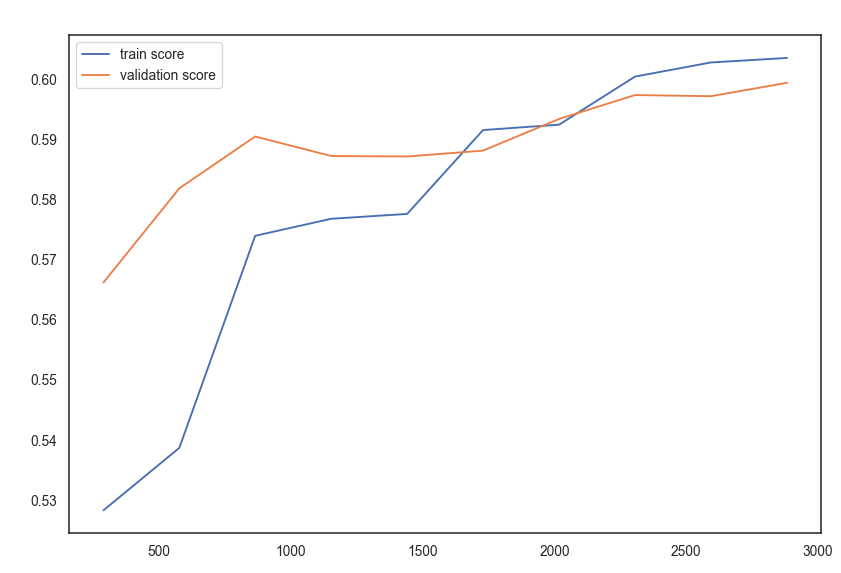

**Régression logistique avec les 67 features comprenant 95% de la variance**

- Régression logistique sans hyperparamètres
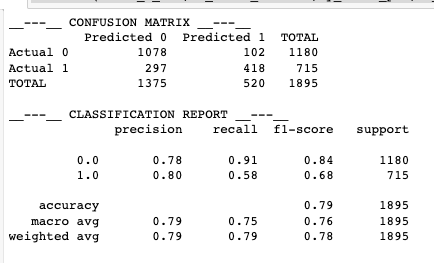
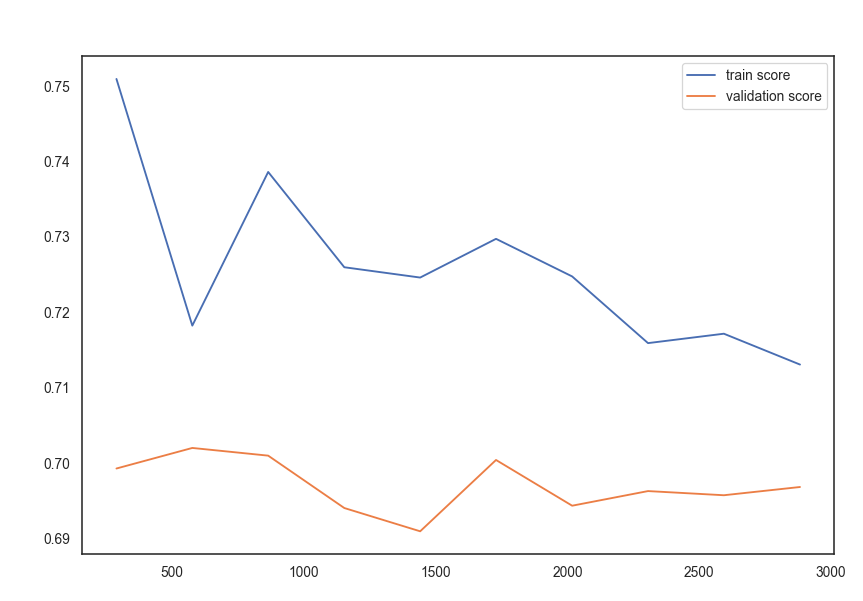

- Régression logistique avec une régularisation et un liblinear
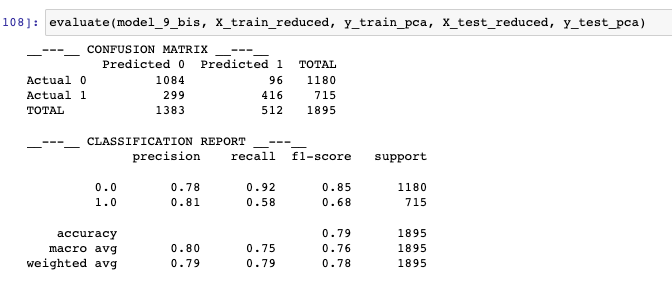
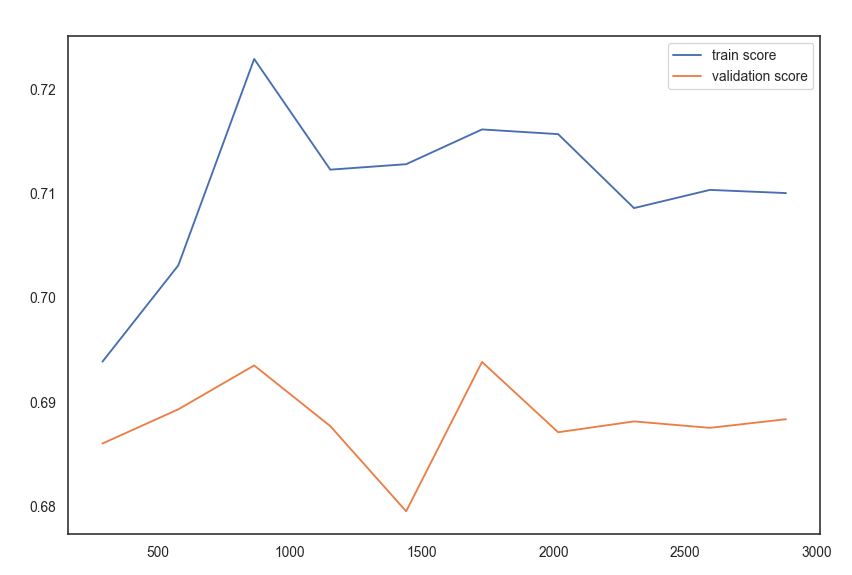

In [76]:
X_train_First2 = pd.DataFrame(X_train_reduced)[[0,1]]

In [77]:
X_test_First2 = pd.DataFrame(X_test_reduced)[[0,1]]

__---__ CONFUSION MATRIX __---__
          Predicted 0  Predicted 1  TOTAL
Actual 0         1121           59   1180
Actual 1          392          323    715
TOTAL            1513          382   1895

__---__ CLASSIFICATION REPORT __---__
              precision    recall  f1-score   support

         0.0       0.74      0.95      0.83      1180
         1.0       0.85      0.45      0.59       715

    accuracy                           0.76      1895
   macro avg       0.79      0.70      0.71      1895
weighted avg       0.78      0.76      0.74      1895



<IPython.core.display.Javascript object>


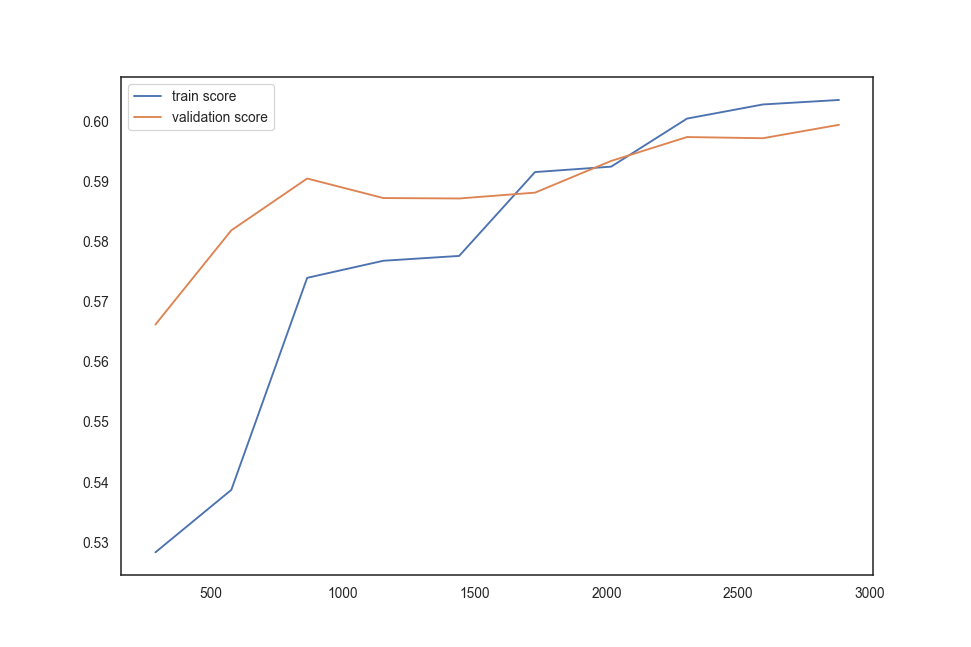

In [78]:
evaluate(model_5_bis, X_train_First2, y_train_pca, X_test_First2, y_test_pca)

__---__ CONFUSION MATRIX __---__
          Predicted 0  Predicted 1  TOTAL
Actual 0         1078          102   1180
Actual 1          297          418    715
TOTAL            1375          520   1895

__---__ CLASSIFICATION REPORT __---__
              precision    recall  f1-score   support

         0.0       0.78      0.91      0.84      1180
         1.0       0.80      0.58      0.68       715

    accuracy                           0.79      1895
   macro avg       0.79      0.75      0.76      1895
weighted avg       0.79      0.79      0.78      1895



<IPython.core.display.Javascript object>


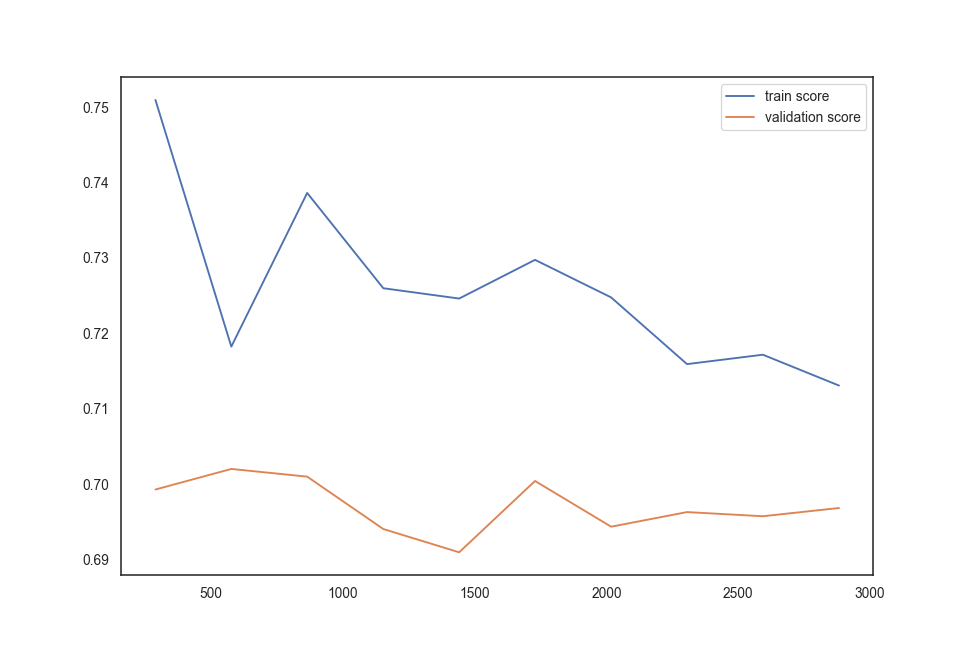

In [107]:

evaluate(model_5_bis, X_train_reduced, y_train_pca, X_test_reduced, y_test_pca)

__---__ CONFUSION MATRIX __---__
          Predicted 0  Predicted 1  TOTAL
Actual 0         1084           96   1180
Actual 1          299          416    715
TOTAL            1383          512   1895

__---__ CLASSIFICATION REPORT __---__
              precision    recall  f1-score   support

         0.0       0.78      0.92      0.85      1180
         1.0       0.81      0.58      0.68       715

    accuracy                           0.79      1895
   macro avg       0.80      0.75      0.76      1895
weighted avg       0.79      0.79      0.78      1895



<IPython.core.display.Javascript object>


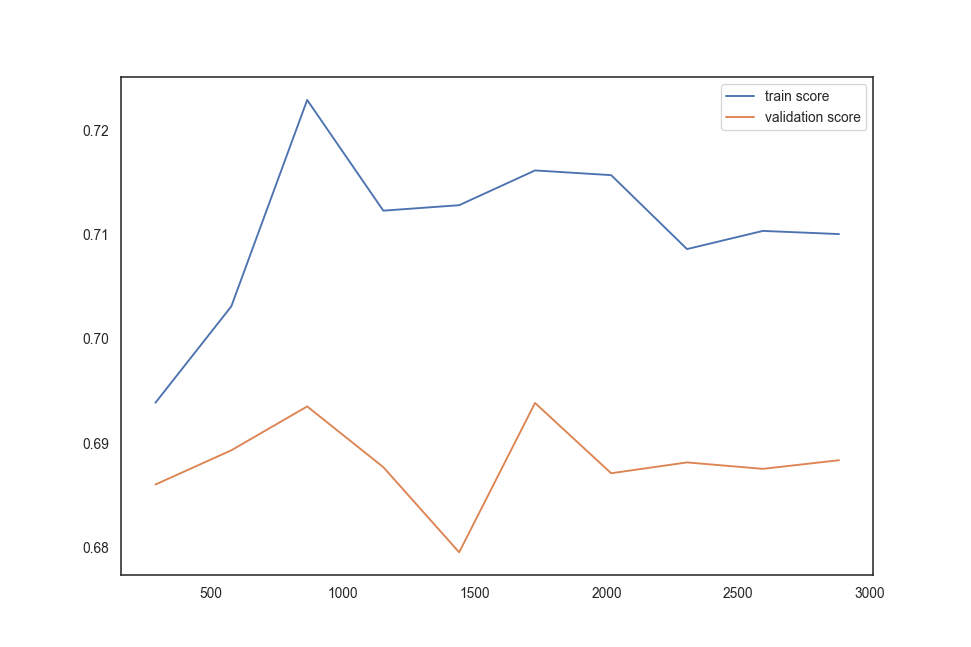

In [108]:
evaluate(model_9_bis, X_train_reduced, y_train_pca, X_test_reduced, y_test_pca)

In [110]:
from sklearn.ensemble import RandomForestClassifier
model_6_bis = RandomForestClassifier(random_state=0)

__---__ CONFUSION MATRIX __---__
          Predicted 0  Predicted 1  TOTAL
Actual 0         1053          127   1180
Actual 1          220          495    715
TOTAL            1273          622   1895

__---__ CLASSIFICATION REPORT __---__
              precision    recall  f1-score   support

         0.0       0.83      0.89      0.86      1180
         1.0       0.80      0.69      0.74       715

    accuracy                           0.82      1895
   macro avg       0.81      0.79      0.80      1895
weighted avg       0.82      0.82      0.81      1895



<IPython.core.display.Javascript object>


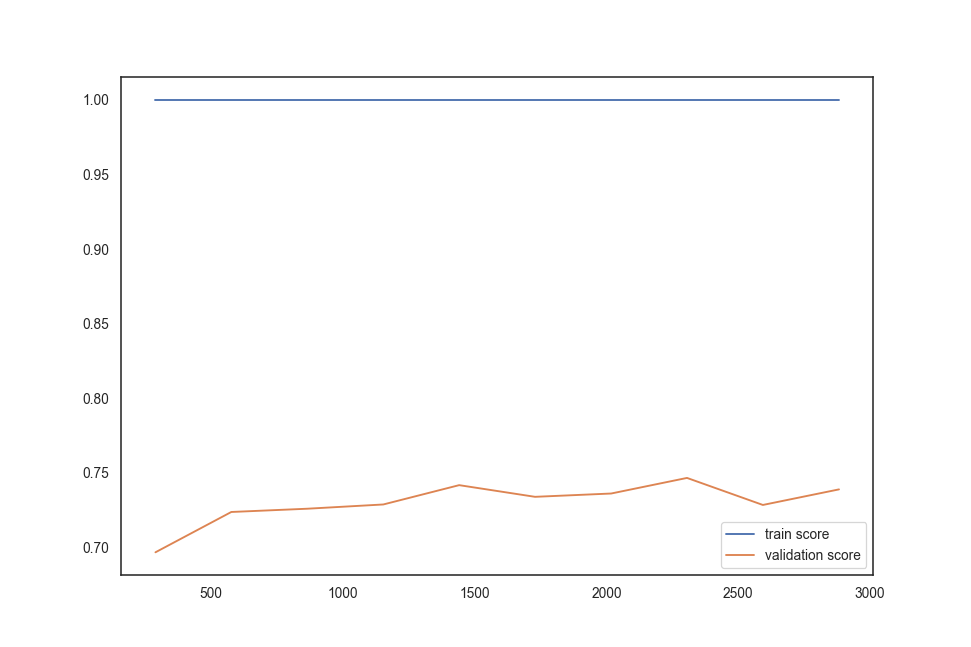

In [112]:
evaluate(model_6_bis, X_train_reduced, y_train_pca, X_test_reduced, y_test_pca)

In [118]:
from sklearn.svm import SVC
model_10 = SVC(gamma='auto', kernel='linear')
model_11 = SVC(gamma='auto', kernel='linear')

__---__ CONFUSION MATRIX __---__
          Predicted 0  Predicted 1  TOTAL
Actual 0         1096           84   1180
Actual 1          310          405    715
TOTAL            1406          489   1895

__---__ CLASSIFICATION REPORT __---__
              precision    recall  f1-score   support

         0.0       0.78      0.93      0.85      1180
         1.0       0.83      0.57      0.67       715

    accuracy                           0.79      1895
   macro avg       0.80      0.75      0.76      1895
weighted avg       0.80      0.79      0.78      1895



<IPython.core.display.Javascript object>


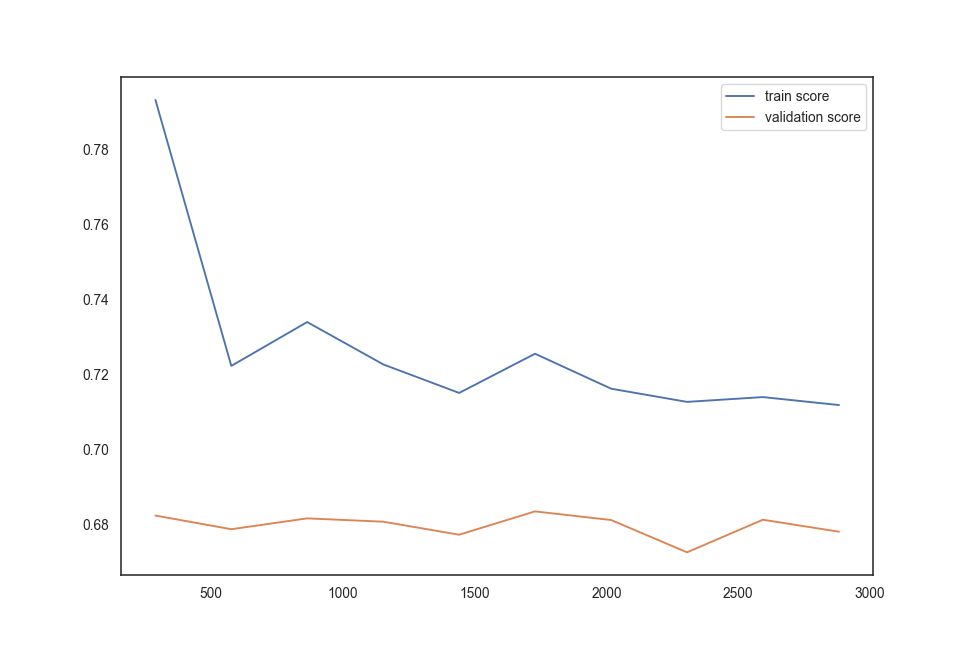

In [119]:
evaluate(model_10, X_train_reduced, y_train, X_test_reduced, y_test)

# Et ensuite ?

## Au 27/05/2022 :
- Côté modèle :
    - approfondir la PCA
        - la mettre dans le pipeline de base pour pouvoir conserver les variables catégorielles et retester ainsi les différents modèles (en gros faire un prépro v2)
        - Tester différents hyperparamètres pour les K Means (notamment pour l'algo)
        - Essayer aussi d'autres modèles de clustering non supervisé
        - Essayer de trouver une manière de les représenter graphiquement (mais pas crucial)
    - choisir un modèle
        - faire un random search ou un lazy predict sur quelques combinaisons de modèles et d'hyperparamètres
        - Se décider pour un modèle final
        - ATtention si régression logistique travailler sur les résidus et autres conditions (peut-être que ca nécessitera de revenir sur quelques variables

- Côté API / Streamlit :
     - Mettre un cadre pour afficher les résultats
     - Prévoir une page de viz
     - Tester de mettre sur Heroku
- Autres :
     - Faire un test MLFlow
     - Prévoir la POO et les tests
     - Prévoir une DB

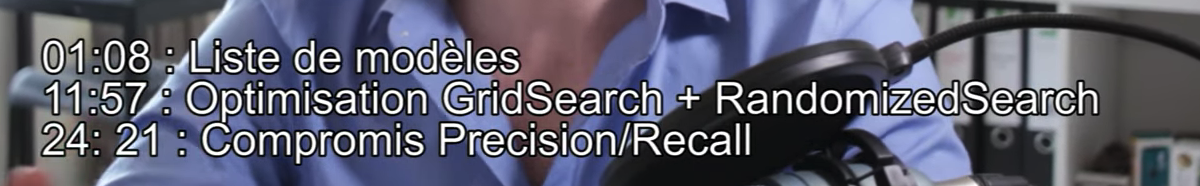

# Workflow jusqu'au bout (API etc)

## Choix d'un modèle simple

In [67]:
# SELECTION DES COLONNES
# Juste 3 colonnes, une de chaque type pour faciliter futurs ajouts
baseline=df.copy()
X = baseline[['Dettes fiscales et sociales (DY) 2018 (€)', "Catégorie juridique (Niveau II)", 'A 21']]
y = baseline['default']

X = X.rename(columns={'Dettes fiscales et sociales (DY) 2018 (€)':'dettes'
                  , "Catégorie juridique (Niveau II)":"statut"
                  , 'A 21':'APE'})

In [68]:
# identification des types de colonnes
num_cols = X.select_dtypes(np.number).columns
categ_cols = ["statut"] #["Catégorie juridique (Niveau II)"]
ordinal_cols = ['APE'] #['A 21']
ordinal_encoding = [['C','E','P','H','F','I','R','G','N','J','S','Q','M','K','A','L','D','O','B']]
print(num_cols)
print(categ_cols)
print(ordinal_cols)

Index(['dettes'], dtype='object')
['statut']
['APE']


In [69]:
# TRAIN TEST SPLIT
from sklearn.model_selection import train_test_split

# on peut dans un premier temps séparer en 2 le dataset :
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [70]:
from sklearn.preprocessing import RobustScaler, OneHotEncoder, OrdinalEncoder

from sklearn.impute import SimpleImputer

from sklearn.pipeline import make_pipeline

from sklearn.compose import ColumnTransformer

In [71]:
numerical_pipeline = make_pipeline(SimpleImputer(strategy='constant', fill_value=0), RobustScaler())
categorical_pipeline = make_pipeline(OneHotEncoder(handle_unknown='ignore'))
ordinal_pipeline = make_pipeline(OrdinalEncoder(categories = ordinal_encoding, handle_unknown = "use_encoded_value", unknown_value=-999))

In [72]:
preprocessing = ColumnTransformer([("pipe_cat", categorical_pipeline, categ_cols),
                                   ("pipe_ordinal", ordinal_pipeline, ordinal_cols),
                                   ("pipe_num", numerical_pipeline, num_cols)],
                                  remainder="drop")

In [73]:
# entrainement du modèle
from sklearn.linear_model import LogisticRegression
model = make_pipeline(preprocessing, LogisticRegression(max_iter=1000))
model.fit(X_train, y_train)
model.score(X_train, y_train)

0.6635452961672473

In [77]:
X

dettes                                      statut APE
5      420269              Société par actions simplifiée   C
9     1033667              Société par actions simplifiée   C
10     273051              Société par actions simplifiée   C
11     858581              Société par actions simplifiée   K
12      95683              Société par actions simplifiée   L
...       ...                                         ...  ..
6183    38023     Société à responsabilité limitée (SARL)   I
6184    60941     Société à responsabilité limitée (SARL)   J
6185    48886     Société à responsabilité limitée (SARL)   S
6186   331493  Société anonyme à conseil d'administration   I
6187   119545     Société à responsabilité limitée (SARL)   F

[5740 rows x 3 columns]

In [74]:
# save model (Joblib)
from joblib import dump, load
dump(model, '/Users/marie/Ecole_IA/4-Certif/1-Projet_chef_doeuvre/code/all_1/fit_model.joblib')

['/Users/marie/Ecole_IA/4-Certif/1-Projet_chef_doeuvre/code/all_1/fit_model.joblib']

In [79]:
# create new input data
x1 = pd.DataFrame({'dettes':[34000], 'statut':['Société par actions simplifiée'], 'APE':['C']})

In [82]:
# predict on input data with first model
model.predict(x1)

array([1.])

In [83]:
# load saved model and predict with it on input data
model2 = load('/Users/marie/Ecole_IA/4-Certif/1-Projet_chef_doeuvre/code/all_1/fit_model.joblib')

In [84]:
# classe prédite
model2.predict(x1)

array([1.])

In [86]:
model2.predict_proba(x1)

array([[0.43099315, 0.56900685]])

In [89]:
# probabilité de fail
model2.predict_proba(x1)[0][1]

0.5690068518679695

In [ ]:
# prepro sur le nouveau X
# TODO
#### 1) Récupérer le JSON issu de l'API, le transformer en dataframe (mettre au même format que le X qu'on utilise ici)
#### 2) Appliquer au X le même prépro puis faire un predict.

In [509]:
# Modèle 5 : régression logistique sur toutes les variables
from sklearn.linear_model import LogisticRegression

model_5 = make_pipeline(preprocessing, LogisticRegression(max_iter=1000))
model_9 = make_pipeline(preprocessing, LogisticRegression(max_iter=1000, solver='liblinear', penalty='l1', C=0.5))

X5_train = trainset.drop(["default"], axis=1)
y5_train = trainset["default"]
X5_test = testset.drop(["default"], axis=1)
y5_test = testset["default"]

In [ ]:
api_model = LogisticRegression()

In [167]:
# Modèle 1 : régression logistique avec le taux
# Modèle 2 : régression logistique juste sur l'A 21, mais cette fois encodé en one hot

In [77]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression


model_3 = LogisticRegression()
model_4 = LogisticRegression()

In [79]:
#### Train test split => on en refait un car rajout de la colonne Taux de dettes fiscales dans le df eda

from sklearn.model_selection import train_test_split

# on peut dans un premier temps séparer en 2 le dataset :
trainset, testset = train_test_split(eda, test_size=0.2, random_state=0)

# on vérifie que la distribution de la target reste OK dans les test et train set => c'est OK
trainset['default'].value_counts(normalize=True)

testset['default'].value_counts(normalize=True)

0.00000   0.61066
1.00000   0.38934
Name: default, dtype: float64

In [80]:
# modèle 3 : régression logistique sur le taux

X3_train = trainset[["Taux dettes fiscales sur CA"]]
y3_train = trainset["default"]
X3_test = testset[["Taux dettes fiscales sur CA"]]
y3_test = testset["default"]

In [81]:
# modèle 4 : régression logistique sur la valeur

X4_train = trainset[['Dettes fiscales et sociales (DY) 2018 (€)']]
y4_train = trainset["default"]
X4_test = testset[['Dettes fiscales et sociales (DY) 2018 (€)']]
y4_test = testset["default"]

__---__ CONFUSION MATRIX __---__
          Predicted 0  Predicted 1  TOTAL
Actual 0          744           12    756
Actual 1          446           36    482
TOTAL            1190           48   1238

__---__ CLASSIFICATION REPORT __---__
              precision    recall  f1-score   support

         0.0       0.63      0.98      0.76       756
         1.0       0.75      0.07      0.14       482

    accuracy                           0.63      1238
   macro avg       0.69      0.53      0.45      1238
weighted avg       0.67      0.63      0.52      1238



<IPython.core.display.Javascript object>


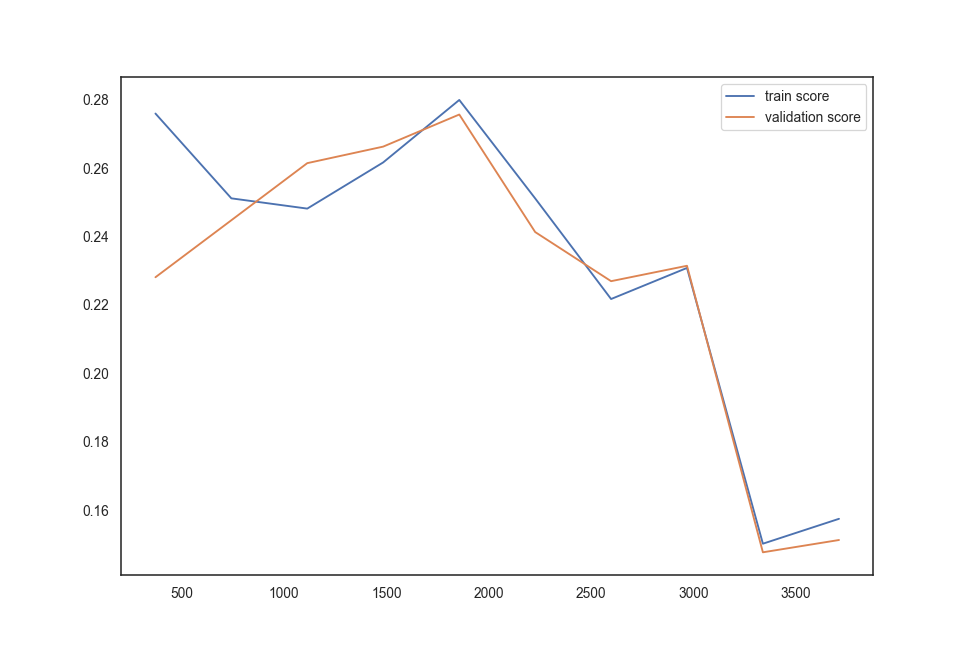

In [82]:
evaluate(model_3, X3_train, y3_train, X3_test, y3_test)

__---__ CONFUSION MATRIX __---__
          Predicted 0  Predicted 1  TOTAL
Actual 0          268          488    756
Actual 1          104          378    482
TOTAL             372          866   1238

__---__ CLASSIFICATION REPORT __---__
              precision    recall  f1-score   support

         0.0       0.72      0.35      0.48       756
         1.0       0.44      0.78      0.56       482

    accuracy                           0.52      1238
   macro avg       0.58      0.57      0.52      1238
weighted avg       0.61      0.52      0.51      1238



<IPython.core.display.Javascript object>


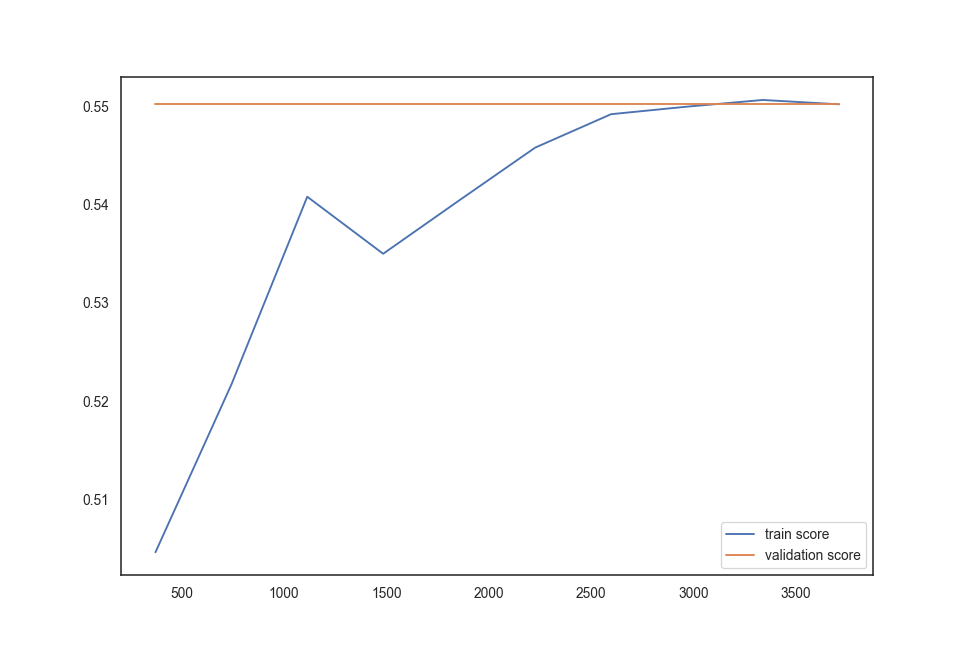

In [83]:
evaluate(model_4, X4_train, y4_train, X4_test, y4_test)

In [20]:
df

Date de création  Capital souscrit non appelé (I) (AA) 2018 (€)  TOTAL (II) (net) (BJNET) 2018 (€)  Matières premières, approvisionnements (net) (BLNET) 2018 (€)  En cours de production de biens (net) (BNNET) 2018 (€)  En cours de production de services (net) (BPNET) 2018 (€)  Produits intermédiaires et finis (net) (BRNET) 2018 (€)  Marchandises (net) (BTNET) 2018 (€)  Avances et acomptes versés sur commandes (net) (BVNET) 2018 (€)  Clients et comptes rattachés (3) (net) (BXNET) 2018 (€)  Autres créances (3) (net) (BZNET) 2018 (€)  Capital souscrit et appelé, non versé (net) (CBNET) 2018 (€)  Valeurs mobilières de placement (net) (CDNET) 2018 (€)  Disponibilités (net) (CFNET) 2018 (€)  Charges constatées d'avance (3) (net) (CHNET) 2018 (€)  TOTAL (III) (net) (CJNET) 2018 (€)  Primes de remboursement des obligations (CM) 2018 (€)  Ecarts de conversion actif (CN) 2018 (€)  TOTAL GENERAL(I à VI) (net) (CONET) 2018 (€)  Capital social ou individuel (1) (DA) 2018 (€)  \
0          1998-04-15                                              0                              27000                                                  0                                                              0                                                       0                                                          0                                    5179606                                            3108623                                                           136992                                           1364228                                                  0                                                             0                                     4442112                                              25465                                 14257028                                                  0                                             0                                      14284028                                          442260   
1          1985-05-04                                              0                            2897808                                                  0                                                              0                                                   68462                                                          0                                   20562168                                               4440                                                          6225974                                           4096665                                                  0                                                            23                                      850613                                              54661                                 31863007                                                  0                                             0                                      34760815                                         2930800   
2          1991-02-01                                              0                           17126177                                             748128                                                       24104235                                                       0                                                     129169                                          0                                                  0                                                          3465696                                            669890                                                  0                                                             0                                        5905                                               9504                                 29132528                                                  0                                             0                                      46258706                                         8100000   
3          1971-01-01                                            

In [24]:
trainset

Date de création  Capital souscrit non appelé (I) (AA) 2018 (€)  TOTAL (II) (net) (BJNET) 2018 (€)  Matières premières, approvisionnements (net) (BLNET) 2018 (€)  En cours de production de biens (net) (BNNET) 2018 (€)  En cours de production de services (net) (BPNET) 2018 (€)  Produits intermédiaires et finis (net) (BRNET) 2018 (€)  Marchandises (net) (BTNET) 2018 (€)  Avances et acomptes versés sur commandes (net) (BVNET) 2018 (€)  Clients et comptes rattachés (3) (net) (BXNET) 2018 (€)  Autres créances (3) (net) (BZNET) 2018 (€)  Capital souscrit et appelé, non versé (net) (CBNET) 2018 (€)  Valeurs mobilières de placement (net) (CDNET) 2018 (€)  Disponibilités (net) (CFNET) 2018 (€)  Charges constatées d'avance (3) (net) (CHNET) 2018 (€)  TOTAL (III) (net) (CJNET) 2018 (€)  Primes de remboursement des obligations (CM) 2018 (€)  Ecarts de conversion actif (CN) 2018 (€)  TOTAL GENERAL(I à VI) (net) (CONET) 2018 (€)  Capital social ou individuel (1) (DA) 2018 (€)  \
4786       2007-01-11                                              0                              10933                                               9475                                                              0                                                       0                                                          0                                     108940                                               7596                                                           124165                                            170833                                                  0                                                             0                                       56169                                               4308                                   481486                                                  0                                             0                                        492419                                          791000   
4396       1993-01-07                                              0                            1424577                                                  0                                                              0                                                       0                                                          0                                          0                                              31300                                                           821345                                            299149                                                  0                                                             0                                       38529                                              12578                                  1202902                                                  0                                             0                                       2627478                                          200000   
3609       2014-11-28                                              0                             469557                                              13383                                                              0                                                       0                                                          0                                          0                                                  0                                                                0                                              9008                                                  0                                                             0                                        1768                                                622                                    24780                                                  0                                             0                                        494338                                          154500   
263        2013-01-07                                            